# <center> Butter-E Dataset Notebooks: Energy Consumption of ML Models </center>
---

This notebook creates the industry-wide ML model energy consumption plots.

In [34]:
import pandas as pd
import os
import numpy as np
import scipy
import scipy.stats
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import datetime
from matplotlib.axis import Axis 

from common import *

In [35]:
df = pd.read_excel('./data_inputs/ML_model_details.xlsx',sheet_name=2)

In [36]:
df.shape

(567, 33)

In [37]:
df = df[['System','Domain','Publication date','Parameters','Training compute (FLOP)']]

In [38]:
df[df['System']=='ADALINE']

,System,Domain,Publication date,Parameters,Training compute (FLOP)
555,ADALINE,Vision,1960-06-30,17.0,9900


In [39]:
df.shape

(567, 5)

In [40]:
df1 = df[['System','Publication date','Parameters']]

In [41]:
df1.shape

(567, 3)

In [42]:
df1[df1['Parameters'].isna()].shape

(259, 3)

In [43]:
df1_sel = df1[df1['Parameters'].notna()]

In [44]:
df1_sel.shape

(308, 3)

In [45]:
df1_sel.set_index('Publication date',drop=True,inplace=True)

In [46]:
df1_sel

,System,Parameters
Publication date,,
2023-07-19,LLaMA 2,7.000000e+10
2023-07-06,InternLM,1.000000e+11
2023-06-20,RoboCat,1.180000e+09
2023-05-10,PaLM 2,3.400000e+11
2023-04-14,OpenAssistant,1.700000e+10
...,...,...
1959-02-01,Pandemonium (morse),3.000000e+03
1957-01-01,Perceptron Mark I,1.000000e+03
1955-03-01,Self Organizing System,2.250000e+02


In [47]:
df[df['Training compute (FLOP)'] == '']

,System,Domain,Publication date,Parameters,Training compute (FLOP)
0,Gen-2,Text-to-Video,2023-12-31,NaN,
1,CALM,Robotics,2023-08-06,NaN,
2,LLaMA 2,Language,2023-07-19,7.000000e+10,
3,Claude 2,Language,2023-07-11,NaN,
4,InternLM,Language,2023-07-06,1.000000e+11,
...,...,...,...,...,...
561,NaN,Vision,1956-07-01,NaN,
562,Self Organizing System,Vision,1955-03-01,2.250000e+02,
563,NaN,Vision,1955-03-01,NaN,
564,NaN,NaN,1954-07-02,NaN,


In [48]:
df[df['Training compute (FLOP)'] != '']

,System,Domain,Publication date,Parameters,Training compute (FLOP)
9,PaLM 2,Language,2023-05-10,3.400000e+11,7339999999999999672844288
12,Cerebras-GPT,Language,2023-03-28,1.300000e+10,23328000000000000000000
14,Falcon,Language,2023-03-17,4.000000e+10,241920000000000000000000
15,GPT-4,Multimodal,2023-03-15,NaN,20999999999999999110807552
17,LLaMA (65B),Language,2023-02-24,6.520000e+10,550000000000000004194304
...,...,...,...,...,...
555,ADALINE,Vision,1960-06-30,1.700000e+01,9900
558,Samuel Neural Checkers,Games,1959-07-01,1.600000e+01,428400000
559,Pandemonium (morse),Other,1959-02-01,3.000000e+03,600000000
560,Perceptron Mark I,Vision,1957-01-01,1.000000e+03,694894.937736


In [49]:
df2 = df[df['Training compute (FLOP)'] != '']

In [50]:
df2.shape

(188, 5)

In [51]:
df2['Training compute (FLOP)']

9       7339999999999999672844288
12        23328000000000000000000
14       241920000000000000000000
15     20999999999999999110807552
17       550000000000000004194304
                  ...            
555                          9900
558                     428400000
559                     600000000
560                 694894.937736
566                            40
Name: Training compute (FLOP), Length: 188, dtype: object

In [52]:
df2['Training compute (FLOP)'] = df2['Training compute (FLOP)'].astype(float)

/tmp/ipykernel_56894/1068824083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Training compute (FLOP)'] = df2['Training compute (FLOP)'].astype(float)


In [53]:
df2

,System,Domain,Publication date,Parameters,Training compute (FLOP)
9,PaLM 2,Language,2023-05-10,3.400000e+11,7.340000e+24
12,Cerebras-GPT,Language,2023-03-28,1.300000e+10,2.332800e+22
14,Falcon,Language,2023-03-17,4.000000e+10,2.419200e+23
15,GPT-4,Multimodal,2023-03-15,NaN,2.100000e+25
17,LLaMA (65B),Language,2023-02-24,6.520000e+10,5.500000e+23
...,...,...,...,...,...
555,ADALINE,Vision,1960-06-30,1.700000e+01,9.900000e+03
558,Samuel Neural Checkers,Games,1959-07-01,1.600000e+01,4.284000e+08
559,Pandemonium (morse),Other,1959-02-01,3.000000e+03,6.000000e+08
560,Perceptron Mark I,Vision,1957-01-01,1.000000e+03,6.948949e+05


In [54]:
df2_sel = df2[['System','Publication date','Training compute (FLOP)']]

In [55]:
df2_sel.set_index('Publication date',drop=True,inplace=True)

early 1.6775110421580632
late 0.3709065657354297


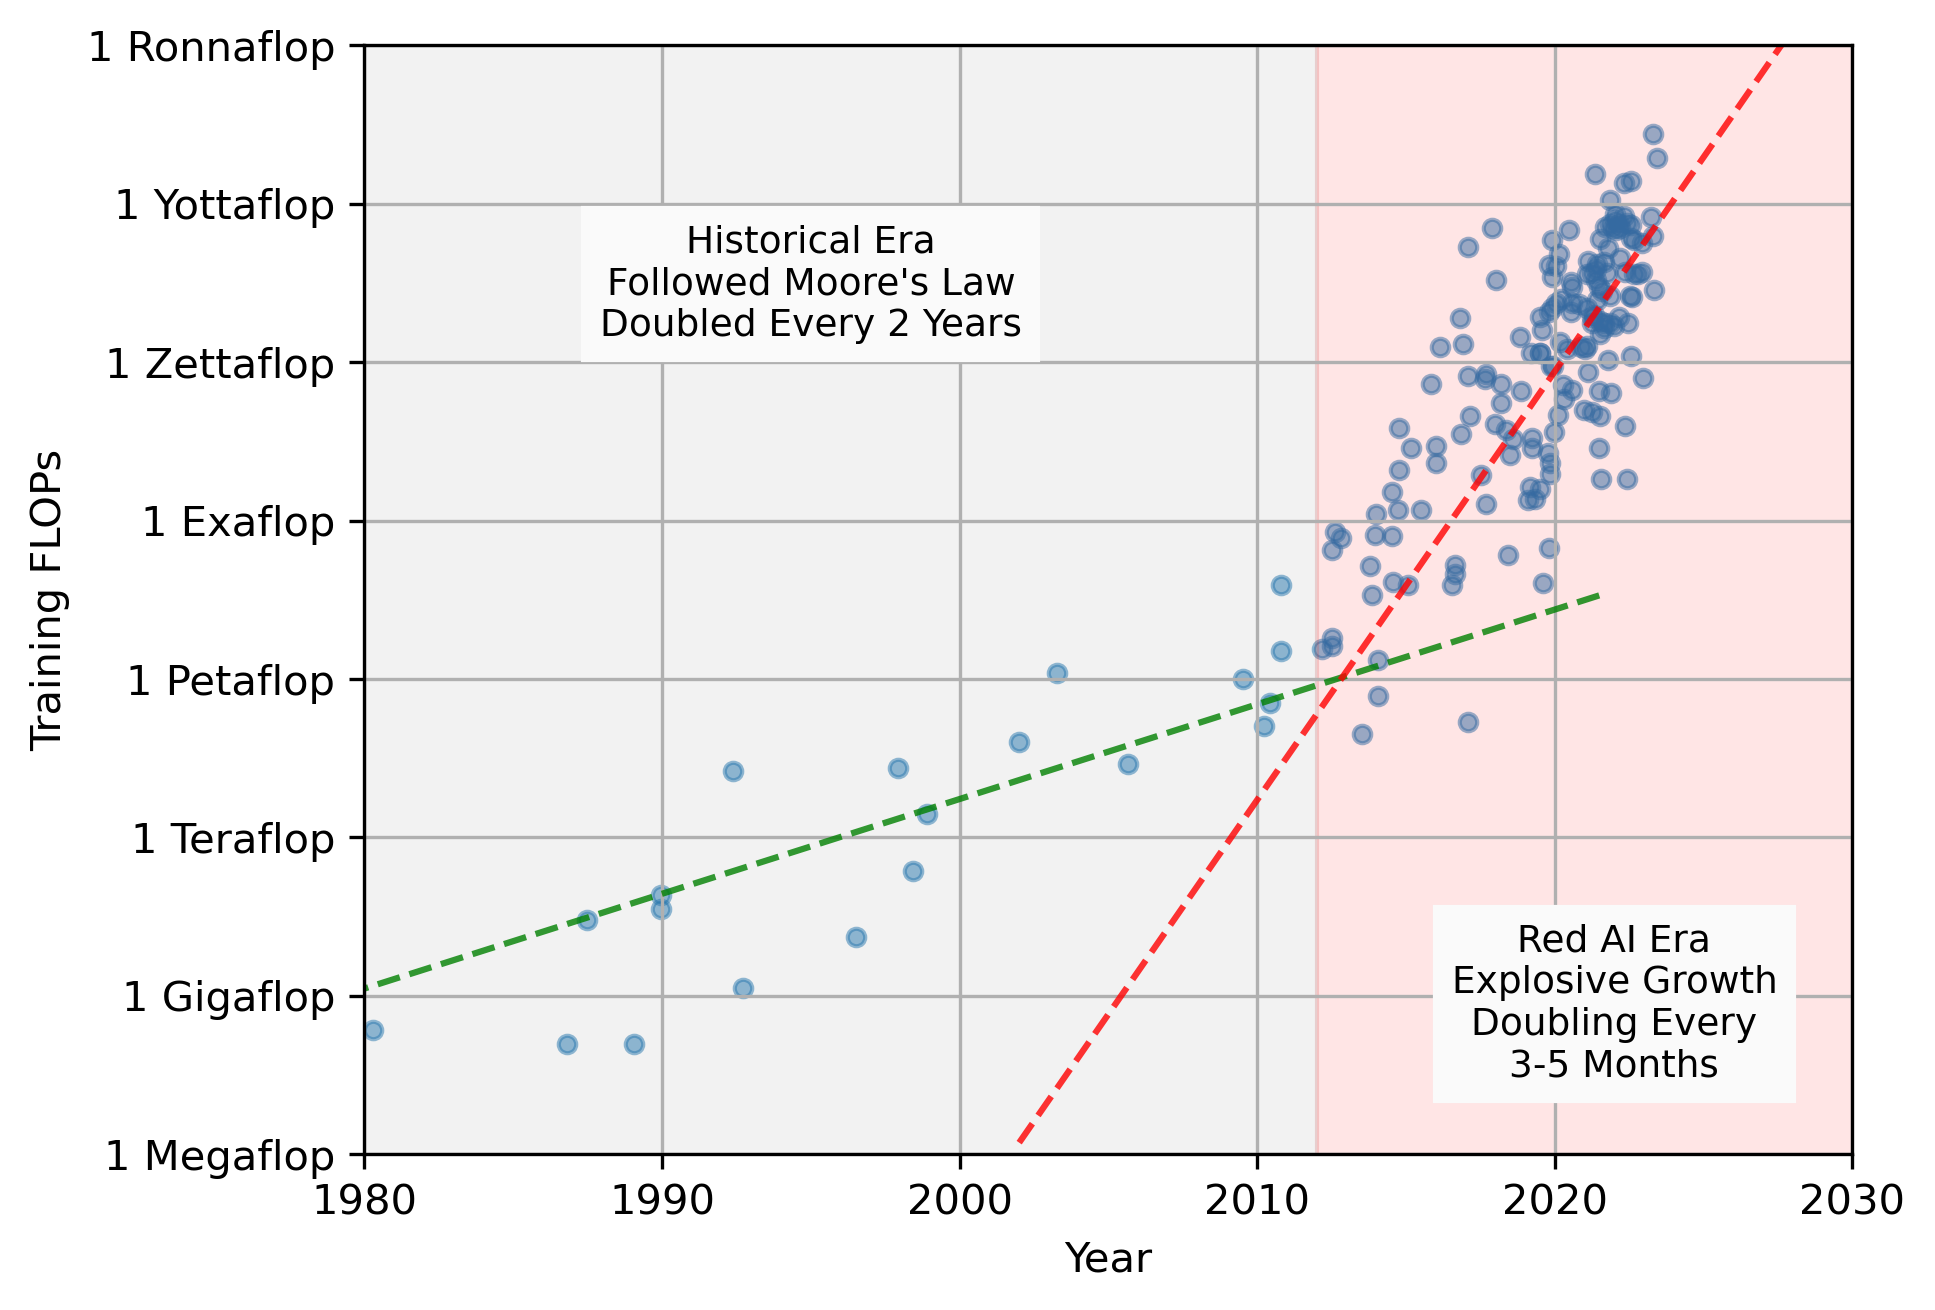

In [56]:
df2_sel = df2_sel.copy()
df2_sel['Log Training FLOPs'] = np.log10(df2_sel['Training compute (FLOP)'])
min_year = 1900
df2_sel['Year'] = ((df2_sel.index -pd.Timestamp(datetime.date(min_year,1,1)))  / np.timedelta64(365,'D')).astype(np.float64) + min_year

plt.figure(dpi=300)
plt.scatter(df2_sel['Year'], df2_sel['Training compute (FLOP)'], marker='.', alpha=.5, s=70)
plt.grid()



# split = pd.Timestamp(datetime.date(2012, 1,1))
split = 2012
early = df2_sel.loc[df2_sel['Year'] <= split]
late = df2_sel.loc[df2_sel['Year'] >= split+7]

early_reg = scipy.stats.linregress(early['Year'], early['Log Training FLOPs'])
x = np.arange(1949, split+10, .25)
plt.plot(x, np.power(10, early_reg.intercept + early_reg.slope*x), 'g--', label='Historical Trend', alpha=.8)

late_reg = scipy.stats.linregress(late['Year'], late['Log Training FLOPs'])
print(f'early {np.log10(2) / early_reg.slope}')
print(f'late {np.log10(2) / late_reg.slope}')

x = np.arange(split-10, 2030, .25)
plt.semilogy(x, np.power(10, late_reg.intercept + late_reg.slope*x), 'r--', label='Modern Trend', alpha=.8)
plt.fill_between((1950, 2012), (1, 1), (1e27, 1e27), alpha=.1, color='grey')
plt.fill_between((2012, 2040), (1, 1), (1e27, 1e27), alpha=.1, color='red')
plt.xlabel('Year')
plt.ylabel('Training FLOPs')
plt.yticks([1e0, 1e3, 1e6, 1e9, 1e12, 1e15, 1e18, 1e21, 1e24, 1e27], ['1', '1 kiloflop', '1 Megaflop', '1 Gigaflop', '1 Teraflop', '1 Petaflop', '1 Exaflop', '1 Zettaflop', '1 Yottaflop', '1 Ronnaflop'])

plt.xlim(1980, 2030)
plt.ylim(1e6, 1e27)
plt.text(1995, 30e21, "Historical Era\nFollowed Moore's Law\nDoubled Every 2 Years",  ha="center", va="center", fontsize =9, backgroundcolor='0.98')
plt.text(2022, 700e6, "Red AI Era\nExplosive Growth\nDoubling Every\n3-5 Months",  ha="center", va="center", fontsize =9, backgroundcolor='0.98')
# plt.ylabel('log$_{10}$(Number of Training FLOPs)')
plt.show()


In [57]:
def datetime_to_year_float(src, min_year=1900):
    return ((src -pd.Timestamp(datetime.date(min_year,1,1)))  / np.timedelta64(365,'D')).astype(np.float64) + min_year

cpudb_path = './data_inputs/cpudb'
cpudb_dfs = {}
for filename in os.listdir(cpudb_path):
    path = os.path.join(cpudb_path, filename)
    print(path)
    try:
        cpudb_dfs[filename[:-4]] = pd.read_csv(path)
    except Exception as e:
        print(e)

cpudb = cpudb_dfs['processor'].copy()
print(cpudb.columns)
# for k, v in cpudb_dfs.items():
#     # print(k)
#     # print(v.head(10))'
#     if k != 'processor.csv' and 'id' in v.columns:
#         print(k)
#         print(v.columns)
#         cpudb = cpudb.merge(v, how='left', on='id', suffixes=[None, '_' + k])

def prefix_df(prefix, df):
    return df.rename(columns={c: (prefix + c) for c in df.columns})

# manufacturer = prefix_df('manufacturer_', cpudb_dfs['manufacturer'].copy())
# print(manufacturer.columns)
# cpudb = cpudb.merge(manufacturer, how='left', on='manufacturer_id', suffixes=[None, '_manufacturer'])

def prefix_merge(left, right, right_prefix, on_left, on_right, how='left', right_suffix='_'):
    column_map = {c: (right_prefix + c) for c in right.columns}
    column_map[on_right] = on_left
    right = right.rename(columns=column_map)
    return left.merge(right, how=how, on=on_left, suffixes=[None, right_suffix])

def merge_cpudb(right_name, on_left, on_right, how='left', right_suffix='_'):
    right = cpudb_dfs[right_name]
    return prefix_merge(cpudb, right, right_name + '_', 
        on_left, on_right, how=how, right_suffix=right_suffix)



cpudb = merge_cpudb('manufacturer', 'manufacturer_id', 'manufacturer_id')
cpudb = prefix_merge(cpudb, cpudb_dfs['cache'], 'cache_on_', 'cache_on_id', 'id')
cpudb = prefix_merge(cpudb, cpudb_dfs['cache'], 'cache_off_', 'cache_off_id', 'id')
cpudb = merge_cpudb('core_mark', 'id', 'processor_id')
cpudb = merge_cpudb('microarchitecture', 'microarchitecture_id', 'id')
cpudb = merge_cpudb('power', 'id', 'processor_id')
cpudb = merge_cpudb('spec_fp1992', 'id', 'processor_id')
cpudb = merge_cpudb('spec_fp1995', 'id', 'processor_id')
cpudb = merge_cpudb('spec_fp2000', 'id', 'processor_id')
cpudb = merge_cpudb('spec_fp2006', 'id', 'processor_id')
cpudb = merge_cpudb('spec_int1992', 'id', 'processor_id')
cpudb = merge_cpudb('spec_int1995', 'id', 'processor_id')
cpudb = merge_cpudb('spec_int2000', 'id', 'processor_id')
cpudb = merge_cpudb('spec_int2006', 'id', 'processor_id')


cpudb['datetime'] = cpudb['date'].apply(lambda s : datetime.datetime.fromisoformat(s) if (isinstance(s, str) and s.lower() != 'nan')  else s)
cpudb = cpudb.loc[cpudb['datetime'] > datetime.datetime.fromisoformat('1975-01-01')]
cpudb = cpudb.loc[cpudb['clock'] < 6000]
cpudb = cpudb.copy()

./data_inputs/cpudb/spec_int2000.csv
./data_inputs/cpudb/spec_fp1992.csv
./data_inputs/cpudb/code_name.csv
./data_inputs/cpudb/mips_est.csv
./data_inputs/cpudb/intel-processors
[Errno 21] Is a directory: './data_inputs/cpudb/intel-processors'
./data_inputs/cpudb/processor.csv
./data_inputs/cpudb/cache.csv
./data_inputs/cpudb/manufacturer.csv
./data_inputs/cpudb/gate_delay.csv
./data_inputs/cpudb/core_mark.csv
./data_inputs/cpudb/die_photo.csv
./data_inputs/cpudb/spec_fp2000.csv
./data_inputs/cpudb/microarchitecture.csv
./data_inputs/cpudb/schema_migration.csv
./data_inputs/cpudb/spec_fp1995.csv
./data_inputs/cpudb/spec_int1992.csv
./data_inputs/cpudb/spec_fp2006.csv
./data_inputs/cpudb/spec_int1995.csv
./data_inputs/cpudb/top500
[Errno 21] Is a directory: './data_inputs/cpudb/top500'
./data_inputs/cpudb/power.csv
./data_inputs/cpudb/technologie.csv
./data_inputs/cpudb/processor_familie.csv
./data_inputs/cpudb/spec_int2006.csv
./data_inputs/cpudb/user.csv
No columns to parse from file
I

In [58]:
cpudb['Year'] = datetime_to_year_float(cpudb['datetime'])

cpudb['FLOPs'] = cpudb['hw_ncores'] * cpudb['clock'] * 1e6

m = (cpudb['Year'] >= 1996) & (cpudb['Year'] < 2000)
cpudb.loc[m,'FLOPs'] = 2 * cpudb.loc[m]['FLOPs']
m = (cpudb['Year'] >= 2000) & (cpudb['Year'] < 2011)
cpudb.loc[m,'FLOPs'] = 4 * cpudb.loc[m]['FLOPs']
m = (cpudb['Year'] >= 2011) & (cpudb['Year'] < 2015)
cpudb.loc[m,'FLOPs'] = 8 * cpudb.loc[m]['FLOPs']
m = (cpudb['Year'] >= 2015)
cpudb.loc[m,'FLOPs'] = 13 * cpudb.loc[m]['FLOPs']

In [59]:
intel_processors_path = './data_inputs/intel-processors'

intel_dfs = {}
for filename in os.listdir(intel_processors_path):
    if filename.endswith('.csv'):
        path = os.path.join(intel_processors_path, filename)
        print(path)
        try:
            intel_dfs[filename[:-4]] = pd.read_csv(path)
        except Exception as e:
            print(e)
intel = pd.concat(intel_dfs.values())

def convert_release_date_to_year(date):
    if type(date) == float:
        return None
    # print(f'"{date}", {date[-2:]}, {date[1]}')
    x = datetime.datetime(2000 + int(date[-2:]),int(1+ 3 * (int(date[1]) - 1)),1)
    if x > datetime.datetime(2022,10,1,1):
        return None
    return x

intel['Release Date'] = intel['Release Date'].apply(convert_release_date_to_year)
intel['Year'] = datetime_to_year_float(intel['Release Date'])


intel['Cores'] = intel['Cores'].to_numpy().astype(np.int32)
intel['MHz'] = intel['Base Freq.(GHz)'].to_numpy().astype(np.float64) * 1000.0
intel['FLOPs'] = intel['Cores'] * intel['MHz'] * 13 *1e6


m = (intel['Year'] >= 1996) & (intel['Year'] < 2000)
intel.loc[m,'FLOPs'] = 2 * intel.loc[m]['FLOPs']
m = (intel['Year'] >= 2000) & (intel['Year'] < 2011)
intel.loc[m,'FLOPs'] = 4 * intel.loc[m]['FLOPs']
m = (intel['Year'] >= 2011) & (intel['Year'] < 2015)
intel.loc[m,'FLOPs'] = 8 * intel.loc[m]['FLOPs']
m = (intel['Year'] >= 2015)
intel.loc[m,'FLOPs'] = 13 * intel.loc[m]['FLOPs']

print(intel.columns)
print(intel.sample(10))

./data_inputs/intel-processors/intel_xeon_phi_processors_v1_2.csv
./data_inputs/intel-processors/intel_celeron_processors_v1_2.csv
./data_inputs/intel-processors/intel_itanium_processors_v1_2.csv
./data_inputs/intel-processors/intel_quark_SoC_v1_2.csv
./data_inputs/intel-processors/intel_atom_processors_v1_2.csv
./data_inputs/intel-processors/intel_core_processors_v1_5.csv
./data_inputs/intel-processors/intel_xeon_processors_v1_2.csv
./data_inputs/intel-processors/intel_pentium_processors_v1_2.csv
Index(['Product', 'Status', 'Release Date', 'Cores', 'Max. Turbo Freq.(GHz)',
       'Base Freq.(GHz)', 'Cache(MB)', 'Cache Info', 'Integrated Graphics',
       'Base Freq.(MHz)', 'Cache(KB)', 'Threads', 'Lithography(nm)', 'TDP(W)',
       'Year', 'MHz', 'FLOPs'],
      dtype='object')
                                             Product        Status  \
835                                   Core i7-2635QM  Discontinued   
382                                     Xeon E7-2870  Discontinued   


In [60]:
nv = pd.read_csv('./data_inputs/NVIDIA_GPU_Processors_curated.csv')
nv['dt'] = np.array([datetime.datetime.strptime(s, '%m/%d/%y') for s in nv['Launch']])
nv['Processing power (GFLOPS) Single precision'] = np.array([float(str(e).replace(',','')) for e in nv['Processing power (GFLOPS) Single precision'].to_numpy()])
nv['flops'] = nv['Processing power (GFLOPS) Single precision'] * 1e9
print(nv.columns)

Index(['Model', 'Launch', 'Fillrate Pixel (GP/s)', 'Fillrate Texture (GT/s)',
       'Processing power (GFLOPS) Single precision', 'TDP (Watts)', 'dt',
       'flops'],
      dtype='object')


In [61]:
amd = pd.read_csv('./data_inputs/amd_ryzen_processors.csv')
amd['Releasedate'] = np.array([datetime.datetime.strptime(s, '%Y-%m-%d') for s in amd['Releasedate']])
amd['Year'] = datetime_to_year_float(amd['Releasedate'])
# amd['Processing power (GFLOPS) Single precision'] = np.array([float(str(e).replace(',','')) for e in nv['Processing power (GFLOPS) Single precision'].to_numpy()])
# amd['flops'] = nv['Processing power (GFLOPS) Single precision'] * 1e9
amd['Clock (GHz) Base'] = amd['Clock (GHz) Base'].to_numpy().astype(np.float64)
amd['Cores'] = amd['Cores'].to_numpy().astype(np.int32)
amd['TDP'] = amd['TDP'].to_numpy().astype(np.float64)

amd['MHz'] = amd['Clock (GHz) Base'] * 1000
amd['FLOPs'] = amd['Cores'] * amd['MHz'] * 13 *1e6
m = (amd['Year'] >= 1996) & (amd['Year'] < 2000)
amd.loc[m,'FLOPs'] = 2 * amd.loc[m]['FLOPs']
m = (amd['Year'] >= 2000) & (amd['Year'] < 2011)
amd.loc[m,'FLOPs'] = 4 * amd.loc[m]['FLOPs']
m = (amd['Year'] >= 2011) & (amd['Year'] < 2015)
amd.loc[m,'FLOPs'] = 8 * amd.loc[m]['FLOPs']
m = (amd['Year'] >= 2015)
amd.loc[m,'FLOPs'] = 13 * amd.loc[m]['FLOPs']

print(amd.columns)

Index(['Branding and Model', 'Releasedate', 'Clock (GHz) Base',
       'Cores (Threads)', 'Cores', 'Threads', 'TDP', 'Year', 'MHz', 'FLOPs'],
      dtype='object')


In [62]:

# cs = cpudb[cpudb['datetime']>datetime.datetime(2007,1,1)]
# cs = cpudb[cpudb['datetime']>datetime.datetime(1970,1,1) and cpudb['']]
cs = cpudb
# it = intel[intel['Release Date']>=datetime.datetime(2007,1,1)]
it = intel

processors = pd.DataFrame(
    {
        "Year": np.concatenate([cs['Year'], it['Year'], amd['Year'], datetime_to_year_float(nv['dt'])]).astype(np.float64),
        "TDP" : np.concatenate([cs['tdp'], it['TDP(W)'], amd['TDP'], nv['TDP (Watts)']]).astype(np.float64),
        "Cores" : np.concatenate([cs['hw_ncores'], it['Cores'], amd['Cores'], np.zeros((len(nv),))]).astype(np.int32),
        "Clock" : np.concatenate([cs['clock'], it['Base Freq.(GHz)'] * 1000.0, amd['Clock (GHz) Base']* 1000.0, np.zeros((len(nv),))]).astype(np.float64),
        "FLOPs" : np.concatenate([cs['FLOPs'], it['FLOPs'], amd['FLOPs'], nv['flops'] ]).astype(np.float64),
        "Type" : np.concatenate([np.ones((len(cs),), dtype=np.int8) * 1, np.ones((len(it),), dtype=np.int8) * 1, np.ones((len(amd),), dtype=np.int8) * 1, np.ones((len(nv),), dtype=np.int8) * 2]).astype(np.int8),
        # "Source" : np.concatenate([np.ones((len(cs),), dtype=object).fill('CpuDB'), np.ones((len(it),), dtype=np.int8) * 1, np.ones((len(amd),), dtype=np.int8) * 1, np.ones((len(nv),), dtype=np.int8) * 2]).astype(np.int8),
    })

processors.sort_values('Year', inplace=True)
processors['LogFLOPs'] = np.log10(processors['FLOPs'])
print(processors.sample(10))


               Year    TDP  Cores   Clock         FLOPs  Type   LogFLOPs
504739  2006.484932   80.0      2  3000.0  2.400000e+10     1  10.380211
393907  2006.484932   80.0      2  3000.0  2.400000e+10     1  10.380211
382756  2006.484932   80.0      2  3000.0  2.400000e+10     1  10.380211
719490  2006.095890  120.0      4  2660.0  4.256000e+10     1  10.629002
53585   2010.073973   73.0      2  3467.0  2.773600e+10     1  10.443044
35645   2012.073973   80.0      2  3000.0  4.800000e+10     1  10.681241
654701  2010.073973   80.0      2  2000.0  1.600000e+10     1  10.204120
301154  2006.484932   80.0      2  3000.0  2.400000e+10     1  10.380211
385455  2006.484932   80.0      2  3000.0  2.400000e+10     1  10.380211
464220  2006.484932   80.0      2  3000.0  2.400000e+10     1  10.380211


In [63]:
print(processors[processors['Type'] == 2].sample(10))

               Year    TDP  Cores  Clock         FLOPs  Type   LogFLOPs
796158  2015.282192  250.0      0    0.0  6.604800e+12     2  12.819860
796168  2016.893151   75.0      0    0.0  1.862400e+12     2  12.270073
796528  2019.479452   80.0      0    0.0  8.294000e+12     2  12.918764
796347  2014.161644   15.0      0    0.0  3.212000e+11     2  11.506776
796271  2009.093151   23.0      0    0.0  1.440000e+11     2  11.158362
796234  2018.797260  215.0      0    0.0  1.006848e+13     2  13.002964
796105  2012.443836   49.0      0    0.0  3.110000e+11     2  11.492760
796225  2022.013699  185.0      0    0.0  6.400000e+12     2  12.806180
796293  2010.745205   16.5      0    0.0  1.920000e+11     2  11.283301
796529  2007.421918   10.0      0    0.0  1.920000e+10     2  10.283301


early 2.103718867618602
late 0.42519215717964426


/tmp/ipykernel_56894/1331518424.py:61: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


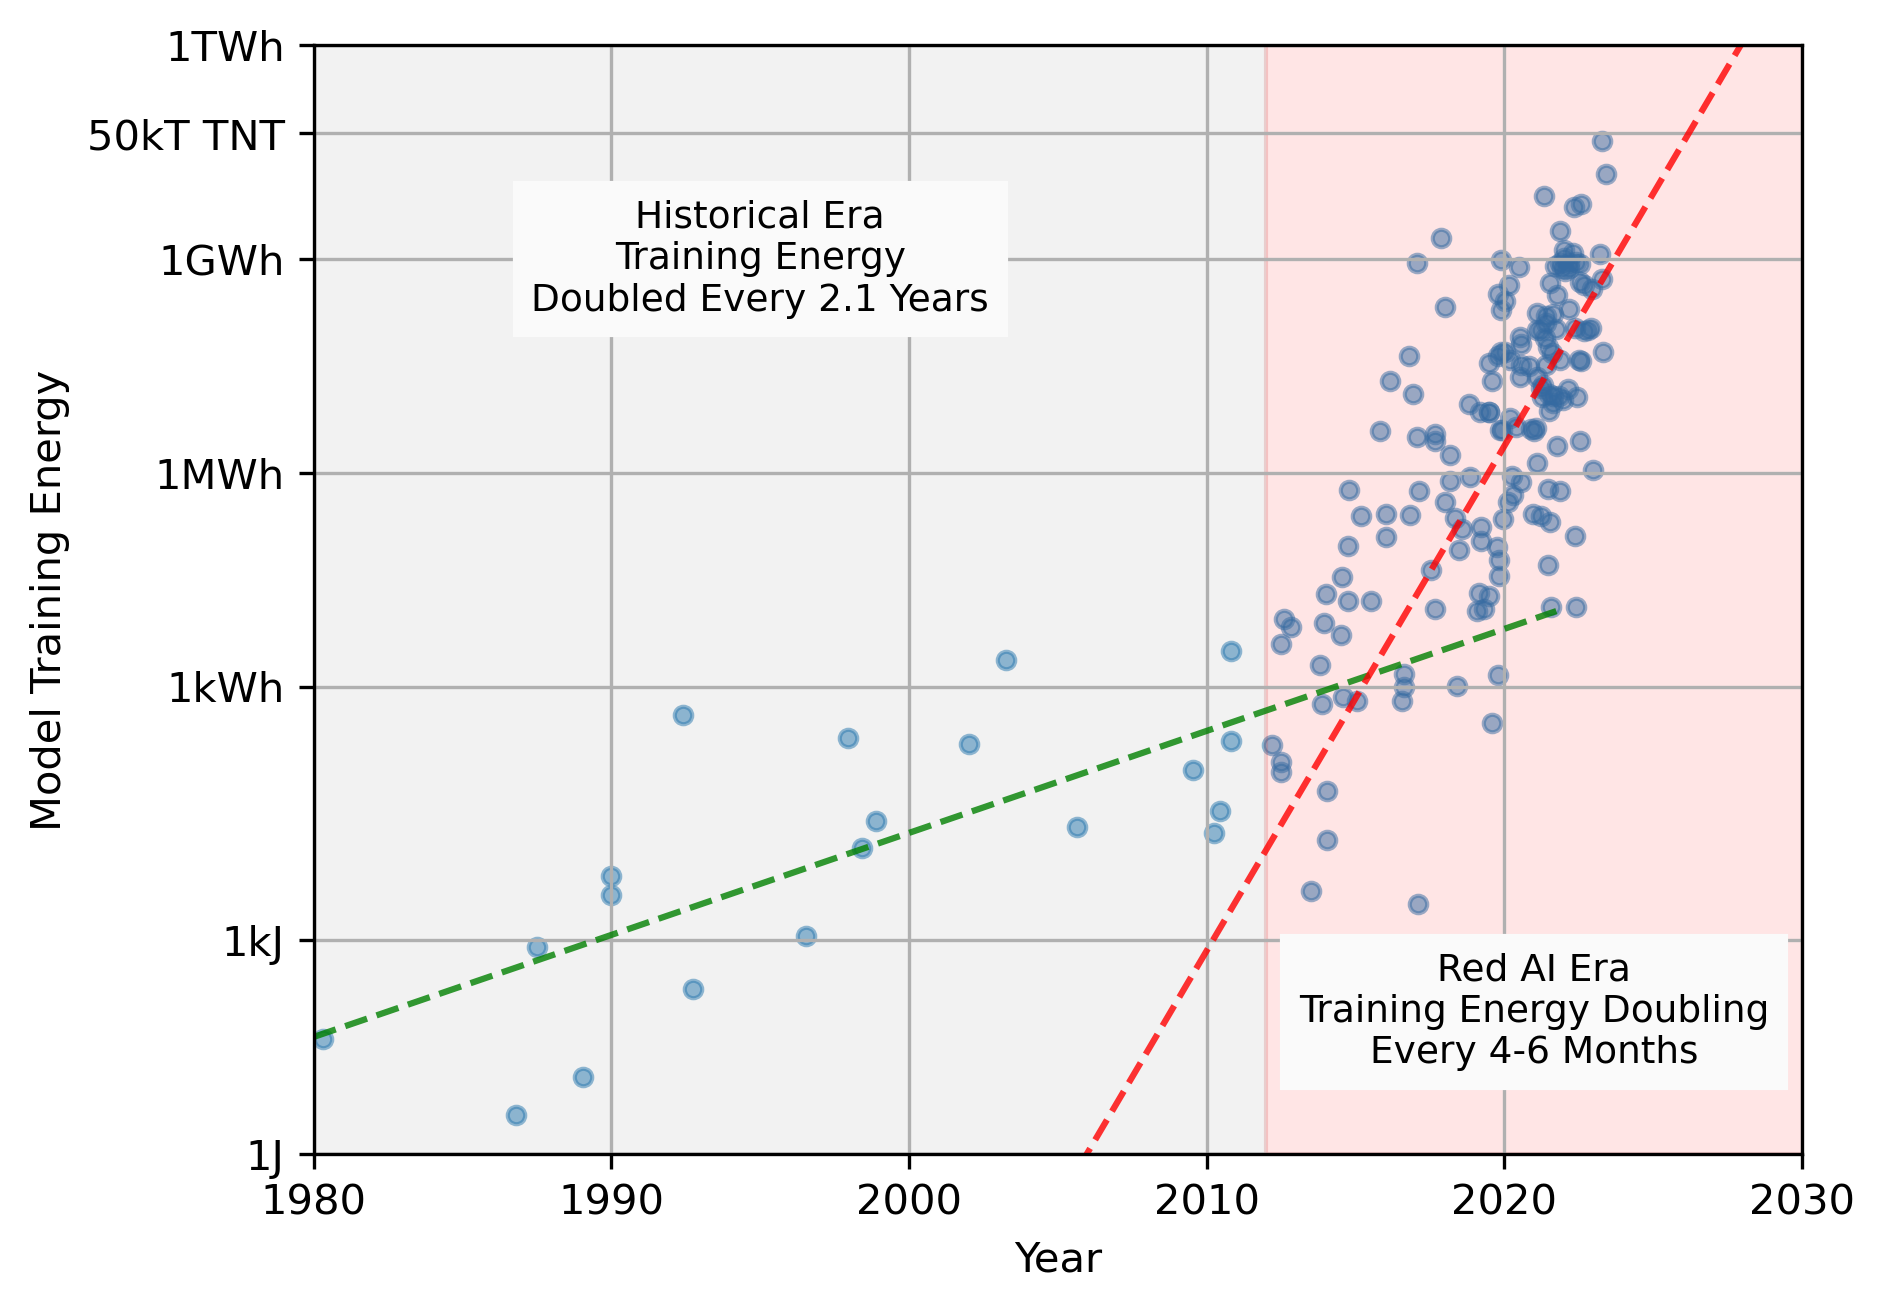

In [64]:
df2_sel['Log Training FLOPs'] = np.log10(df2_sel['Training compute (FLOP)'])
min_year = 1900
df2_sel['Year'] = ((df2_sel.index -pd.Timestamp(datetime.date(min_year,1,1)))  / np.timedelta64(365,'D')).astype(np.float64) + min_year

fig, ax = plt.subplots(figsize = (6.4, 4.8), dpi=300)
plt.grid()
ax.set_yscale('log')
valid_processors = processors[~np.isnan(processors['Year']) & ~np.isnan(processors['LogFLOPs']) & ~pd.isna(processors['TDP'])].copy()
df = df2_sel[df2_sel['Year'] >= valid_processors['Year'].min()].copy()
df.sort_values('Year', inplace=True)
# x = np.arange(1980, 2024, .25)

best_cpu_index = np.array([valid_processors[valid_processors['Year'] <= y]['FLOPs'].argmax() for y in df['Year']])
# df2_sel['Best FLOP/s Avaliable'] = np.array([processors[processors['Year'] <= y]['FLOPs'].max() for y in df2_sel['Year']])
df['Best FLOP/s Avaliable'] = np.array([valid_processors['FLOPs'].iloc[i] for i in best_cpu_index])
df['TDP of Best FLOP/s CPU'] = np.array([valid_processors['TDP'].iloc[i] for i in best_cpu_index])

# df['TDP of Best CPU'] = np.array([valid_processors['TDP'].iloc[i] for i, y in enumerate(df['Year'])])
df['Training CPU-Seconds'] = df['Training compute (FLOP)'] / df['Best FLOP/s Avaliable']
df['Training Joules'] = df['TDP of Best FLOP/s CPU'] * df['Training CPU-Seconds']

valid_df= df[~ pd.isna(df['Training Joules'])].copy()
# y = np.array([processors[processors['Year'] <= y]['FLOPs'].max() for y in df2_sel['Year']])
ax.scatter(valid_df['Year'], valid_df['Training Joules'], marker='.', alpha=.5, s=70)

# print(df2_sel[~pd.isna(df2_sel['Best FLOP/s Avaliable'])]['Year'].min())


split = 2012
early = valid_df.loc[valid_df['Year'] <= split]
late = valid_df.loc[valid_df['Year'] >= split+7]

early_reg = scipy.stats.linregress(early['Year'], np.log10(early['Training Joules']))
print(f'early {np.log10(2) / early_reg.slope}')
x = np.arange(1980, split+10, .25)
ax.plot(x, np.power(10, early_reg.intercept + early_reg.slope*x), 'g--', label='Historical Trend', alpha=.8)


late_reg = scipy.stats.linregress(late['Year'], np.log10(late['Training Joules']))
print(f'late {np.log10(2) / late_reg.slope}')
x = np.arange(split-10, 2030, .25)
ax.plot(x, np.power(10, late_reg.intercept + late_reg.slope*x), 'r--', label='Modern Trend', alpha=.8)


kwhj=3.6e6
whj=kwhj/1e3
kt_tnt=4.184e12

ax.fill_between((1950, 2012), (1, 1), (1e20, 1e20), alpha=.1, color='grey')
ax.fill_between((2012, 2040), (1, 1), (1e20, 1e20), alpha=.1, color='red')

ax.set_xlim(1980, 2030)
ax.set_ylim(1, whj*1e12)
ax.set_xlabel('Year')
ax.set_ylabel('Model Training Energy')
ax.set_yticks([1, 1e3, kwhj, whj*1e6, whj*1e9, 50*kt_tnt, whj*1e12],['1J', '1kJ', '1kWh', '1MWh', '1GWh', '50kT TNT', '1TWh'])
ax.text(1995,whj*1e9 *1, "Historical Era\nTraining Energy\nDoubled Every 2.1 Years",  ha="center", va="center", fontsize =9, backgroundcolor='0.98')
ax.text(2021, 1e3*.1, "Red AI Era\nTraining Energy Doubling\nEvery 4-6 Months",  ha="center", va="center", fontsize =9, backgroundcolor='0.98')
# plt.ylabel('log$_{10}$(Number of Training FLOPs)')

fig.show()


In [65]:
oranges = plt.cm.Oranges(np.linspace(0.25, 1, 4))

In [66]:
oranges

array([[0.99215686, 0.81464052, 0.63360246, 1.        ],
       [0.99141869, 0.55072664, 0.23277201, 1.        ],
       [0.84627451, 0.28069204, 0.00410611, 1.        ],
       [0.49803922, 0.15294118, 0.01568627, 1.        ]])

In [67]:
oranges[3]

array([0.49803922, 0.15294118, 0.01568627, 1.        ])

early 2.103718867618602
late 0.42519215717964426


/tmp/ipykernel_56894/1574808314.py:138: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


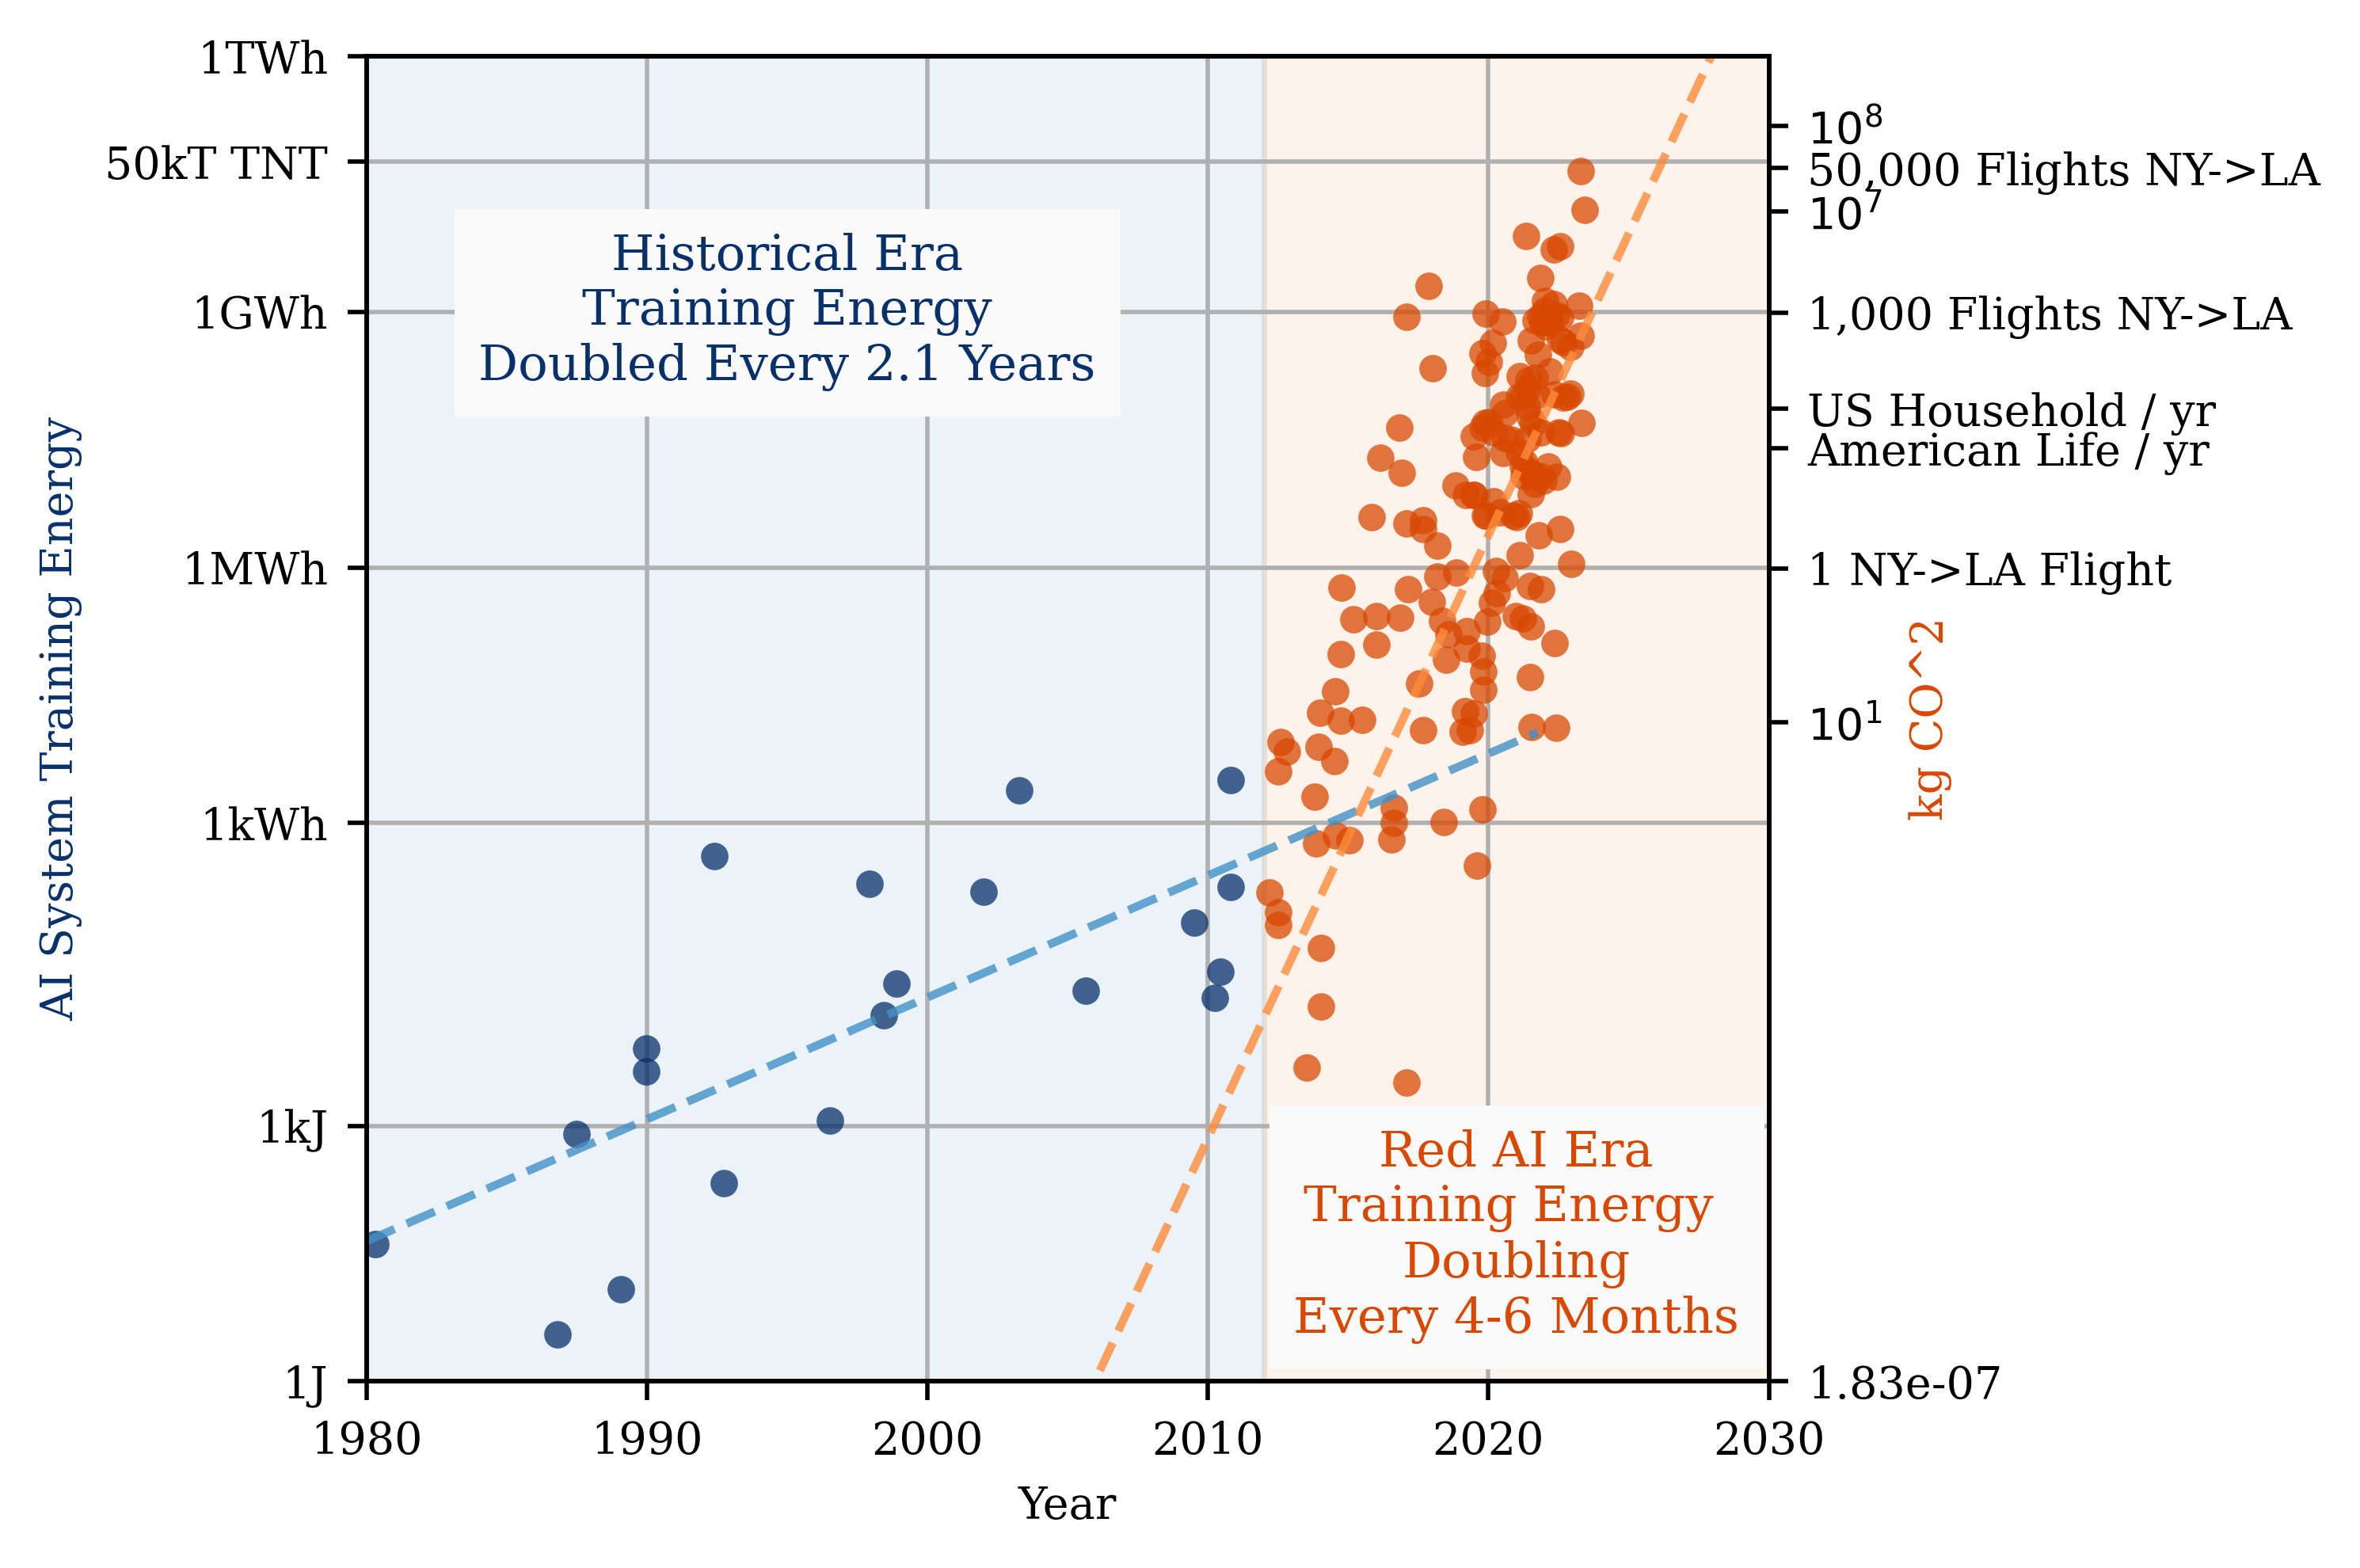

In [68]:
from matplotlib.markers import MarkerStyle

# plt fontsize
plt.rcParams["font.size"] = 8
plt.rcParams["font.family"] = "serif"
plt.rcParams["axes.labelsize"] = 8

oranges=plt.cm.Oranges(np.linspace(0.25, 1, 4))
blues=plt.cm.Blues(np.linspace(0.25, 1, 3))                       


kwhj=3.6e6
whj=kwhj/1e3
kt_tnt=4.184e12
co2lbkwh=0.919 # Use the conversion factor for 2021
lbkg=0.453592
lbmt=lbkg/1000
pue=1.58
co2kg_per_joule = co2lbkwh * lbkg / kwhj

ny_to_la = 642.6 #kg CO2e

df2_sel['Log Training FLOPs'] = np.log10(df2_sel['Training compute (FLOP)'])
min_year = 1900
df2_sel['Year'] = ((df2_sel.index -pd.Timestamp(datetime.date(min_year,1,1)))  / np.timedelta64(365,'D')).astype(np.float64) + min_year

#fig, ax1 = plt.subplots(figsize = (10.4, 8.0), dpi=300)
fig, ax1 = plt.subplots(figsize = (6, 4), dpi=500)


plt.grid()
color1 = blues[2]
color2 = oranges[2]
ax1.set_yscale('log')
ax1.set_ylabel('AI System Training Energy', color=color1)

valid_processors = processors[~np.isnan(processors['Year']) & ~np.isnan(processors['LogFLOPs']) & ~pd.isna(processors['TDP'])].copy()
df = df2_sel[df2_sel['Year'] >= valid_processors['Year'].min()].copy()
df.sort_values('Year', inplace=True)
# x = np.arange(1980, 2024, .25)

best_cpu_index = np.array([valid_processors[valid_processors['Year'] <= y]['FLOPs'].argmax() for y in df['Year']])
# df2_sel['Best FLOP/s Avaliable'] = np.array([processors[processors['Year'] <= y]['FLOPs'].max() for y in df2_sel['Year']])
df['Best FLOP/s Avaliable'] = np.array([valid_processors['FLOPs'].iloc[i] for i in best_cpu_index])
df['TDP of Best FLOP/s CPU'] = np.array([valid_processors['TDP'].iloc[i] for i in best_cpu_index])

# df['TDP of Best CPU'] = np.array([valid_processors['TDP'].iloc[i] for i, y in enumerate(df['Year'])])
df['Training CPU-Seconds'] = df['Training compute (FLOP)'] / df['Best FLOP/s Avaliable']
df['Training Joules'] = df['TDP of Best FLOP/s CPU'] * df['Training CPU-Seconds']
df['CO2e'] = df['Training Joules'] * pue * co2lbkwh * lbkg/kwhj

valid_df= df[~ pd.isna(df['Training Joules'])].copy()
# y = np.array([processors[processors['Year'] <= y]['FLOPs'].max() for y in df2_sel['Year']])
# ax1.scatter(valid_df['Year'], valid_df['Training Joules'], marker='.', alpha=.5, s=80, color=color1)
historical = valid_df.loc[valid_df['Year'] < 2012]
redai = valid_df.loc[valid_df['Year'] >= 2012]
ax1.plot(historical['Year'], historical['Training Joules'], alpha=.75, color=color1, linestyle='', marker='o', fillstyle='full', markeredgecolor='none', markersize=5)
ax1.plot(redai['Year'], redai['Training Joules'], alpha=.75, color=color2, linestyle='', marker='o', fillstyle='full', markeredgecolor='none', markersize=5)
# ax1.scatter(redai['Year'], redai['Training Joules'], marker='.', alpha=.5, s=80, color=color2, fillstyle='full')

y1min = 1.0
y1max = whj*1.0e12

y2min = y1min * (co2kg_per_joule * pue)
y2max = y1max * (co2kg_per_joule * pue)

ax2 = ax1.twinx()


valid_df= df[~ pd.isna(df['CO2e'])].copy()

ax2.set_yscale('log')
ax2.set_ylabel('kg CO^2', color=color2, labelpad=0)

ax2.set_ylim(y2min, y2max)

#ax2.scatter(valid_df['Year'], valid_df['CO2e'], marker='.', alpha=.5, s=80, color=color2)

# print(df2_sel[~pd.isna(df2_sel['Best FLOP/s Avaliable'])]['Year'].min())

ticks = [
    (y2min,'{:.2e}'.format(y2min)),
    (10.0**1,'$10^{1}$'),
    # (718.0*lbkg,'USHholdRefrig(2021)'),
    # (1984.0*lbkg,'1 NY->SF Flight'),
    # (11023.0*lbkg,'HumanLife / yr'),
    (ny_to_la, '1 NY->LA Flight'),
    (36156.0*lbkg,'American Life / yr'),
    (48000.0, 'US Household / yr'),
    (10.0**7,'$10^{7}$'),
    (1000*ny_to_la, '1,000 Flights NY->LA'),
    (50000*ny_to_la, '50,000 Flights NY->LA'),
    # (1000*48000.0, '$1000$ US Households'),
    # (1.1e8,'Kiribati(2022)'),
    (10**8,'$10^{8}$'),
    # (1e,'{:.2e}'.format(y2max)),
    # (y2max,'{:.2e}'.format(y2max)),
    ]

ax2.set_yticks([t[0] for t in ticks], [t[1] for t in ticks])

Axis.set_label_coords(ax2.yaxis,1.1, 0.5) 



split = 2012
early = valid_df.loc[valid_df['Year'] <= split]
late = valid_df.loc[valid_df['Year'] >= split+7]

early_reg = scipy.stats.linregress(early['Year'], np.log10(early['Training Joules']))
print(f'early {np.log10(2) / early_reg.slope}')
x = np.arange(1980, split+10, .25)
ax1.plot(x, np.power(10, early_reg.intercept + early_reg.slope*x), color=blues[1], linestyle='--', label='Historical Trend', alpha=.8)


late_reg = scipy.stats.linregress(late['Year'], np.log10(late['Training Joules']))
print(f'late {np.log10(2) / late_reg.slope}')
x = np.arange(split-10, 2030, .25)
ax1.plot(x, np.power(10, late_reg.intercept + late_reg.slope*x), color=oranges[1], linestyle='--', label='Modern Trend', alpha=.8)


ax1.fill_between((1950, 2012), (1, 1), (1e20, 1e20), alpha=.1, color=blues[1])
ax1.fill_between((2012, 2040), (1, 1), (1e20, 1e20), alpha=.1, color=oranges[1])

ax1.set_xlim(1980, 2030)
ax1.set_ylim(1, whj*1e12)
ax1.set_xlabel('Year')
ax1.set_ylabel('AI System Training Energy')
ax1.set_yticks([1, 1e3, kwhj, whj*1e6, whj*1e9, 50*kt_tnt, whj*1e12],['1J', '1kJ', '1kWh', '1MWh', '1GWh', '50kT TNT', '1TWh'])
ax1.text(1995,whj*1e9 *1, "Historical Era\nTraining Energy\nDoubled Every 2.1 Years",  color=color1, ha="center", va="center", fontsize =9, backgroundcolor='0.98')
ax1.text(2021, 5e2*.1, "Red AI Era\nTraining Energy \nDoubling\nEvery 4-6 Months",  color=color2, ha="center", va="center", fontsize =9, backgroundcolor='0.98')
# plt.ylabel('log$_{10}$(Number of Training FLOPs)')

# plotting the legend 
#ax2.legend(bbox_to_anchor = (0.35, 0.75), loc = 'upper center') 

fig.tight_layout()
fig.show()

early 2.103718867618602
late 0.42519215717964426


/tmp/ipykernel_56894/1069624085.py:142: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


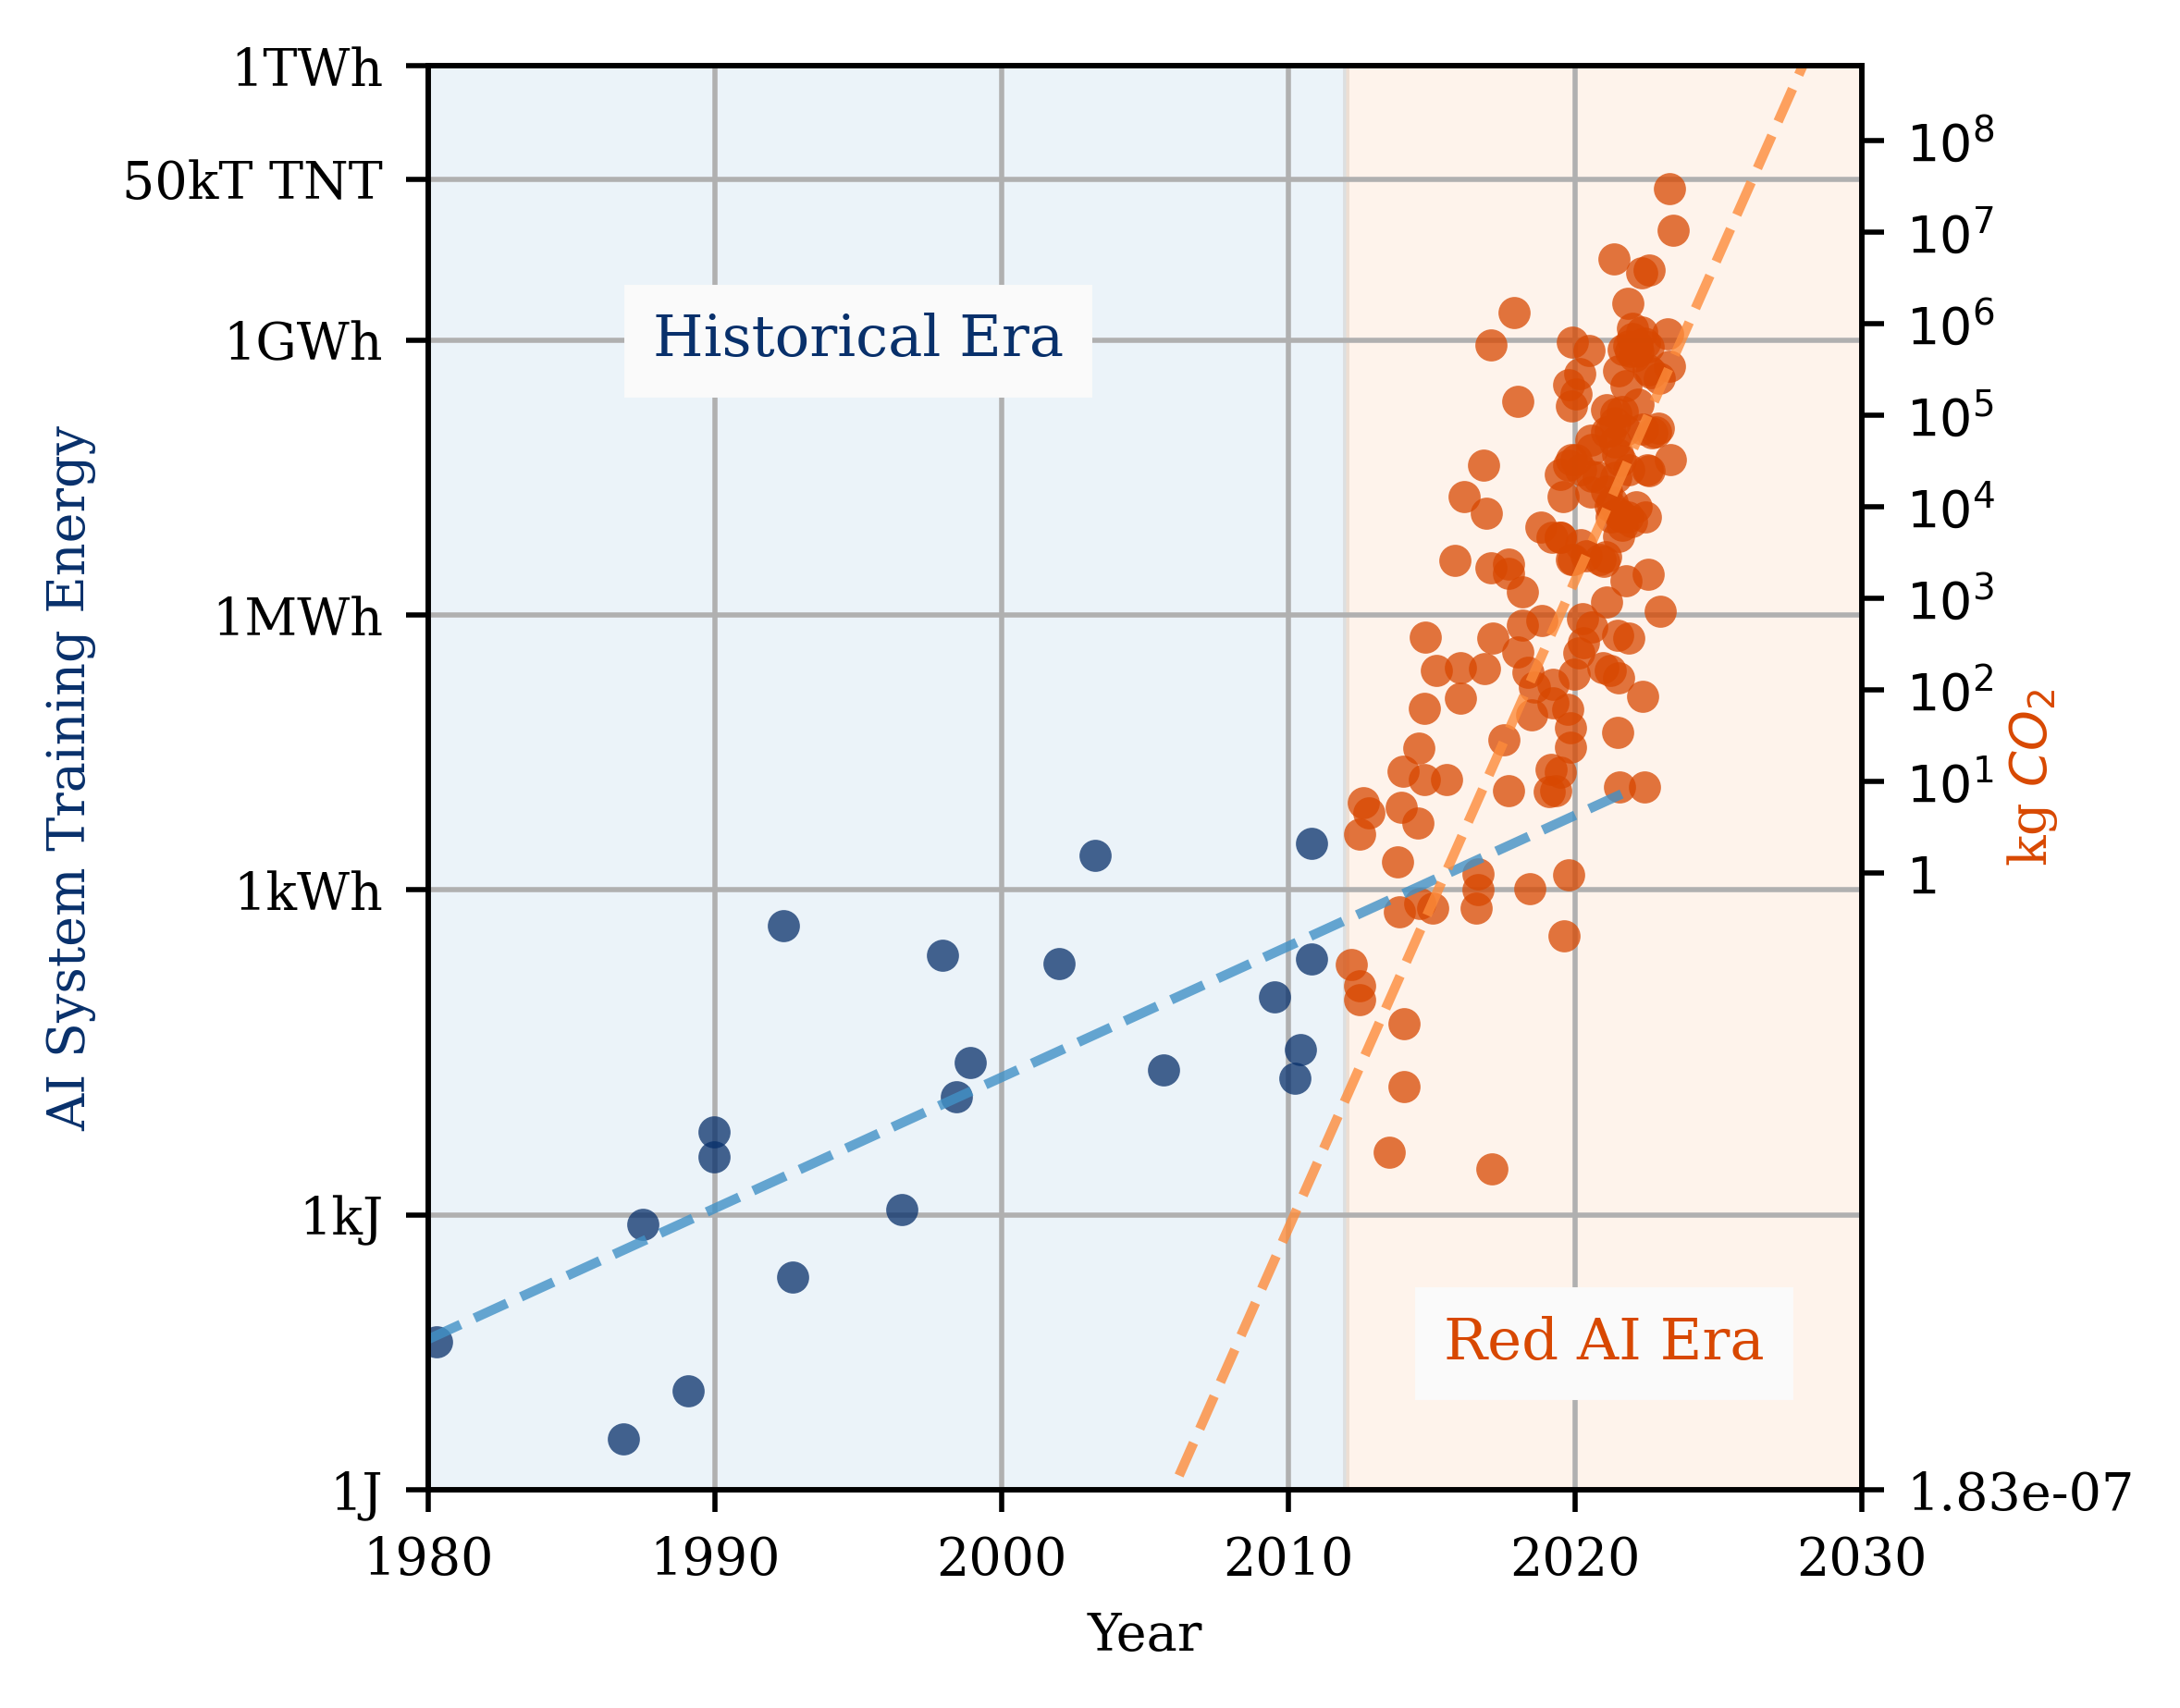

In [69]:
from matplotlib.markers import MarkerStyle

# plt fontsize
plt.rcParams["font.size"] = 8
plt.rcParams["font.family"] = "serif"
plt.rcParams["axes.labelsize"] = 8

oranges=plt.cm.Oranges(np.linspace(0.25, 1, 4))
blues=plt.cm.Blues(np.linspace(0.25, 1, 3))

kwhj=3.6e6
whj=kwhj/1e3
kt_tnt=4.184e12
co2lbkwh=0.919 # Use the conversion factor for 2021
lbkg=0.453592
lbmt=lbkg/1000
pue=1.58
co2kg_per_joule = co2lbkwh * lbkg / kwhj

ny_to_la = 562 #kg CO2e

df2_sel['Log Training FLOPs'] = np.log10(df2_sel['Training compute (FLOP)'])
min_year = 1900
df2_sel['Year'] = ((df2_sel.index -pd.Timestamp(datetime.date(min_year,1,1)))  / np.timedelta64(365,'D')).astype(np.float64) + min_year

#fig, ax1 = plt.subplots(figsize = (10.4, 8.0), dpi=300)
fig, ax1 = plt.subplots(figsize = (4, 4), dpi=500)


plt.grid()
color1 = blues[2]
color2 = oranges[2]
ax1.set_yscale('log')
ax1.set_ylabel('AI System Training Energy', color=color1)

valid_processors = processors[~np.isnan(processors['Year']) & ~np.isnan(processors['LogFLOPs']) & ~pd.isna(processors['TDP'])].copy()
df = df2_sel[df2_sel['Year'] >= valid_processors['Year'].min()].copy()
df.sort_values('Year', inplace=True)
# x = np.arange(1980, 2024, .25)

best_cpu_index = np.array([valid_processors[valid_processors['Year'] <= y]['FLOPs'].argmax() for y in df['Year']])
# df2_sel['Best FLOP/s Avaliable'] = np.array([processors[processors['Year'] <= y]['FLOPs'].max() for y in df2_sel['Year']])
df['Best FLOP/s Avaliable'] = np.array([valid_processors['FLOPs'].iloc[i] for i in best_cpu_index])
df['TDP of Best FLOP/s CPU'] = np.array([valid_processors['TDP'].iloc[i] for i in best_cpu_index])

# df['TDP of Best CPU'] = np.array([valid_processors['TDP'].iloc[i] for i, y in enumerate(df['Year'])])
df['Training CPU-Seconds'] = df['Training compute (FLOP)'] / df['Best FLOP/s Avaliable']
df['Training Joules'] = df['TDP of Best FLOP/s CPU'] * df['Training CPU-Seconds']
df['CO2e'] = df['Training Joules'] * pue * co2lbkwh * lbkg/kwhj

valid_df= df[~ pd.isna(df['Training Joules'])].copy()
# y = np.array([processors[processors['Year'] <= y]['FLOPs'].max() for y in df2_sel['Year']])
# ax1.scatter(valid_df['Year'], valid_df['Training Joules'], marker='.', alpha=.5, s=80, color=color1)
historical = valid_df.loc[valid_df['Year'] < 2012]
redai = valid_df.loc[valid_df['Year'] >= 2012]
ax1.plot(historical['Year'], historical['Training Joules'], alpha=.75, color=color1, linestyle='', marker='o', fillstyle='full', markeredgecolor='none', markersize=5)
ax1.plot(redai['Year'], redai['Training Joules'], alpha=.75, color=color2, linestyle='', marker='o', fillstyle='full', markeredgecolor='none', markersize=5)
# ax1.scatter(redai['Year'], redai['Training Joules'], marker='.', alpha=.5, s=80, color=color2, fillstyle='full')

y1min = 1.0
y1max = whj*1.0e12

y2min = y1min * (co2kg_per_joule * pue)
y2max = y1max * (co2kg_per_joule * pue)

ax2 = ax1.twinx()

valid_df= df[~ pd.isna(df['CO2e'])].copy()

ax2.set_yscale('log')
ax2.set_ylabel('kg $CO_{2}$', color=color2, labelpad=100)

ax2.set_ylim(y2min, y2max)

#ax2.scatter(valid_df['Year'], valid_df['CO2e'], marker='.', alpha=.5, s=80, color=color2)

# print(df2_sel[~pd.isna(df2_sel['Best FLOP/s Avaliable'])]['Year'].min())

ticks = [
    (y2min,'{:.2e}'.format(y2min)),
    (1,'$1$'),
    (1e1,'$10^{1}$'),
    (1e2,'$10^{2}$'),
    (1e3,'$10^{3}$'),
    (1e4,'$10^{4}$'),
    (1e5,'$10^{5}$'),
    (1e6,'$10^{6}$'),
    # (718.0*lbkg,'USHholdRefrig(2021)'),
    # (1984.0*lbkg,'1 NY->SF Flight'),
    # (11023.0*lbkg,'HumanLife / yr'),
    # (ny_to_la, '1 NY->LA Flight'),
    # (36156.0*lbkg,'American Life / yr'),
    # (48000.0, 'US Household / yr'),
    (10.0**7,'$10^{7}$'),
    # (1000*ny_to_la, '1,000 Flights NY->LA'),
    # (50000*ny_to_la, '50,000 Flights NY->LA'),
    # (1000*48000.0, '$1000$ US Households'),
    # (1.1e8,'Kiribati(2022)'),
    (10**8,'$10^{8}$'),
    # (1e,'{:.2e}'.format(y2max)),
    # (y2max,'{:.2e}'.format(y2max)),
    ]

ax2.set_yticks([t[0] for t in ticks], [t[1] for t in ticks])

Axis.set_label_coords(ax2.yaxis,1.1, 0.5) 



split = 2012
early = valid_df.loc[valid_df['Year'] <= split]
late = valid_df.loc[valid_df['Year'] >= split+7]

early_reg = scipy.stats.linregress(early['Year'], np.log10(early['Training Joules']))
print(f'early {np.log10(2) / early_reg.slope}')
x = np.arange(1980, split+10, .25)
ax1.plot(x, np.power(10, early_reg.intercept + early_reg.slope*x), color=blues[1], linestyle='--', label='Historical Trend', alpha=.8)


late_reg = scipy.stats.linregress(late['Year'], np.log10(late['Training Joules']))
print(f'late {np.log10(2) / late_reg.slope}')
x = np.arange(split-10, 2030, .25)
ax1.plot(x, np.power(10, late_reg.intercept + late_reg.slope*x), color=oranges[1], linestyle='--', label='Modern Trend', alpha=.8)


ax1.fill_between((1950, 2012), (1, 1), (1e20, 1e20), alpha=.1, color=blues[1])
ax1.fill_between((2012, 2040), (1, 1), (1e20, 1e20), alpha=.1, color=oranges[1])

ax1.set_xlim(1980, 2030)
ax1.set_ylim(1, whj*1e12)
ax1.set_xlabel('Year')
ax1.set_ylabel('AI System Training Energy')
ax1.set_yticks([1, 1e3, kwhj, whj*1e6, whj*1e9, 50*kt_tnt, whj*1e12],['1J', '1kJ', '1kWh', '1MWh', '1GWh', '50kT TNT', '1TWh'])
ax1.text(1995,whj*1e9 *1, "Historical Era",  color=color1, ha="center", va="center", fontsize =9, backgroundcolor='0.98')
ax1.text(2021, 1e2*.4, "Red AI Era",  color=color2, ha="center", va="center", fontsize =9, backgroundcolor='0.98')
# plt.ylabel('log$_{10}$(Number of Training FLOPs)')

# plotting the legend 
#ax2.legend(bbox_to_anchor = (0.35, 0.75), loc = 'upper center') 

# fig.tight_layout()
fig.show()
#fig.savefig('ai_energy_and_co2_trends.svg',dpi=500, bbox_inches="tight")

In [70]:
cpudb_path = './data_inputs/cpudb'
cpudb_dfs = {}
for filename in os.listdir(cpudb_path):
    path = os.path.join(cpudb_path, filename)
    print(path)
    try:
        cpudb_dfs[filename[:-4]] = pd.read_csv(path)
    except Exception as e:
        print(e)


./data_inputs/cpudb/spec_int2000.csv
./data_inputs/cpudb/spec_fp1992.csv
./data_inputs/cpudb/code_name.csv
./data_inputs/cpudb/mips_est.csv
./data_inputs/cpudb/intel-processors
[Errno 21] Is a directory: './data_inputs/cpudb/intel-processors'
./data_inputs/cpudb/processor.csv
./data_inputs/cpudb/cache.csv
./data_inputs/cpudb/manufacturer.csv
./data_inputs/cpudb/gate_delay.csv
./data_inputs/cpudb/core_mark.csv
./data_inputs/cpudb/die_photo.csv
./data_inputs/cpudb/spec_fp2000.csv
./data_inputs/cpudb/microarchitecture.csv
./data_inputs/cpudb/schema_migration.csv
./data_inputs/cpudb/spec_fp1995.csv
./data_inputs/cpudb/spec_int1992.csv
./data_inputs/cpudb/spec_fp2006.csv
./data_inputs/cpudb/spec_int1995.csv
./data_inputs/cpudb/top500
[Errno 21] Is a directory: './data_inputs/cpudb/top500'
./data_inputs/cpudb/power.csv
./data_inputs/cpudb/technologie.csv
./data_inputs/cpudb/processor_familie.csv
./data_inputs/cpudb/spec_int2006.csv
./data_inputs/cpudb/user.csv
No columns to parse from file


In [71]:
cpudb = cpudb_dfs['processor'].copy()
print(cpudb.columns)
# for k, v in cpudb_dfs.items():
#     # print(k)
#     # print(v.head(10))'
#     if k != 'processor.csv' and 'id' in v.columns:
#         print(k)
#         print(v.columns)
#         cpudb = cpudb.merge(v, how='left', on='id', suffixes=[None, '_' + k])

def prefix_df(prefix, df):
    return df.rename(columns={c: (prefix + c) for c in df.columns})

# manufacturer = prefix_df('manufacturer_', cpudb_dfs['manufacturer'].copy())
# print(manufacturer.columns)
# cpudb = cpudb.merge(manufacturer, how='left', on='manufacturer_id', suffixes=[None, '_manufacturer'])

def prefix_merge(left, right, right_prefix, on_left, on_right, how='left', right_suffix='_'):
    column_map = {c: (right_prefix + c) for c in right.columns}
    column_map[on_right] = on_left
    right = right.rename(columns=column_map)
    return left.merge(right, how=how, on=on_left, suffixes=[None, right_suffix])

def merge_cpudb(right_name, on_left, on_right, how='left', right_suffix='_'):
    right = cpudb_dfs[right_name]
    return prefix_merge(cpudb, right, right_name + '_', 
        on_left, on_right, how=how, right_suffix=right_suffix)



cpudb = merge_cpudb('manufacturer', 'manufacturer_id', 'manufacturer_id')
cpudb = prefix_merge(cpudb, cpudb_dfs['cache'], 'cache_on_', 'cache_on_id', 'id')
cpudb = prefix_merge(cpudb, cpudb_dfs['cache'], 'cache_off_', 'cache_off_id', 'id')
cpudb = merge_cpudb('core_mark', 'id', 'processor_id')
cpudb = merge_cpudb('microarchitecture', 'microarchitecture_id', 'id')
cpudb = merge_cpudb('power', 'id', 'processor_id')
cpudb = merge_cpudb('spec_fp1992', 'id', 'processor_id')
cpudb = merge_cpudb('spec_fp1995', 'id', 'processor_id')
cpudb = merge_cpudb('spec_fp2000', 'id', 'processor_id')
cpudb = merge_cpudb('spec_fp2006', 'id', 'processor_id')
cpudb = merge_cpudb('spec_int1992', 'id', 'processor_id')
cpudb = merge_cpudb('spec_int1995', 'id', 'processor_id')
cpudb = merge_cpudb('spec_int2000', 'id', 'processor_id')
cpudb = merge_cpudb('spec_int2006', 'id', 'processor_id')


cpudb['datetime'] = cpudb['date'].apply(lambda s : datetime.datetime.fromisoformat(s) if (isinstance(s, str) and s.lower() != 'nan')  else s)
cpudb = cpudb.loc[cpudb['datetime'] > datetime.datetime.fromisoformat('1975-01-01')]
cpudb = cpudb.loc[cpudb['clock'] < 6000]
cpudb = cpudb.copy()
# for k, v in ['']:
#     # print(k)
#     # print(v.head(10))'
#     if k != 'processor.csv' and 'id' in v.columns:
#         print(k)
#         print(v.columns)
#         cpudb = cpudb.merge(v, how='left', on='id', suffixes=[None, '_' + k])

Index(['id', 'created_at', 'updated_at', 'manufacturer_id',
       'processor_family_id', 'microarchitecture_id', 'code_name_id',
       'technology_id', 'cache_on_id', 'cache_off_id', 'die_photo_id', 'model',
       'date', 'clock', 'max_clock', 'hw_nthreadspercore', 'hw_ncores', 'tdp',
       'source', 'bus_width', 'transistors', 'die_size', 'vdd_low',
       'vdd_high'],
      dtype='object')


In [72]:
nv = pd.read_csv('./data_inputs/NVIDIA_GPU_Processors_curated.csv')
print(nv.columns)

Index(['Model', 'Launch', 'Fillrate Pixel (GP/s)', 'Fillrate Texture (GT/s)',
       'Processing power (GFLOPS) Single precision', 'TDP (Watts)'],
      dtype='object')


In [73]:
intel_processors_path = './data_inputs/intel-processors'

intel_dfs = {}
for filename in os.listdir(intel_processors_path):
    if filename.endswith('.csv'):
        path = os.path.join(intel_processors_path, filename)
        print(path)
        try:
            intel_dfs[filename[:-4]] = pd.read_csv(path)
        except Exception as e:
            print(e)

./data_inputs/intel-processors/intel_xeon_phi_processors_v1_2.csv
./data_inputs/intel-processors/intel_celeron_processors_v1_2.csv
./data_inputs/intel-processors/intel_itanium_processors_v1_2.csv
./data_inputs/intel-processors/intel_quark_SoC_v1_2.csv
./data_inputs/intel-processors/intel_atom_processors_v1_2.csv
./data_inputs/intel-processors/intel_core_processors_v1_5.csv
./data_inputs/intel-processors/intel_xeon_processors_v1_2.csv
./data_inputs/intel-processors/intel_pentium_processors_v1_2.csv


In [74]:
intel = pd.concat(intel_dfs.values())

def convert_release_date_to_year(date):
    if type(date) == float:
        return None
    # print(f'"{date}", {date[-2:]}, {date[1]}')
    x = datetime.datetime(2000 + int(date[-2:]),int(1+ 3 * (int(date[1]) - 1)),1)
    if x > datetime.datetime(2022,10,1,1):
        return None
    return x

intel['Release Date'] = intel['Release Date'].apply(convert_release_date_to_year)
print(intel.columns)

Index(['Product', 'Status', 'Release Date', 'Cores', 'Max. Turbo Freq.(GHz)',
       'Base Freq.(GHz)', 'Cache(MB)', 'Cache Info', 'Integrated Graphics',
       'Base Freq.(MHz)', 'Cache(KB)', 'Threads', 'Lithography(nm)', 'TDP(W)'],
      dtype='object')


In [75]:
# nv['Processing power (GFLOPS) Single precision'] = nv['Processing power (GFLOPS) Single precision'].astype(float)
# nv['flops'] = nv['Processing power (GFLOPS) Single precision'] * 1e9
# print(nv['Processing power (GFLOPS) Single precision'].unique())
nv['Processing power (GFLOPS) Single precision'] = np.array([float(str(e).replace(',','')) for e in nv['Processing power (GFLOPS) Single precision'].to_numpy()])
nv['flops'] = nv['Processing power (GFLOPS) Single precision'] * 1e9

In [76]:
# print(nv['Launch'].unique())
import datetime
nv['dt'] = np.array([datetime.datetime.strptime(s, '%m/%d/%y') for s in nv['Launch']])

CO2e
Publication date
1980-04-01    7.512115e-06
1986-10-01    6.555476e-07
1987-06-06    1.457619e-04
1989-01-01    2.195416e-06
1989-12-01    1.485327e-03
Name: CO2e, dtype: float64
y2min: 1.829512932888889e-07
y2max: 658624655.84
early 2.103718867618602
late 0.42519215717964426


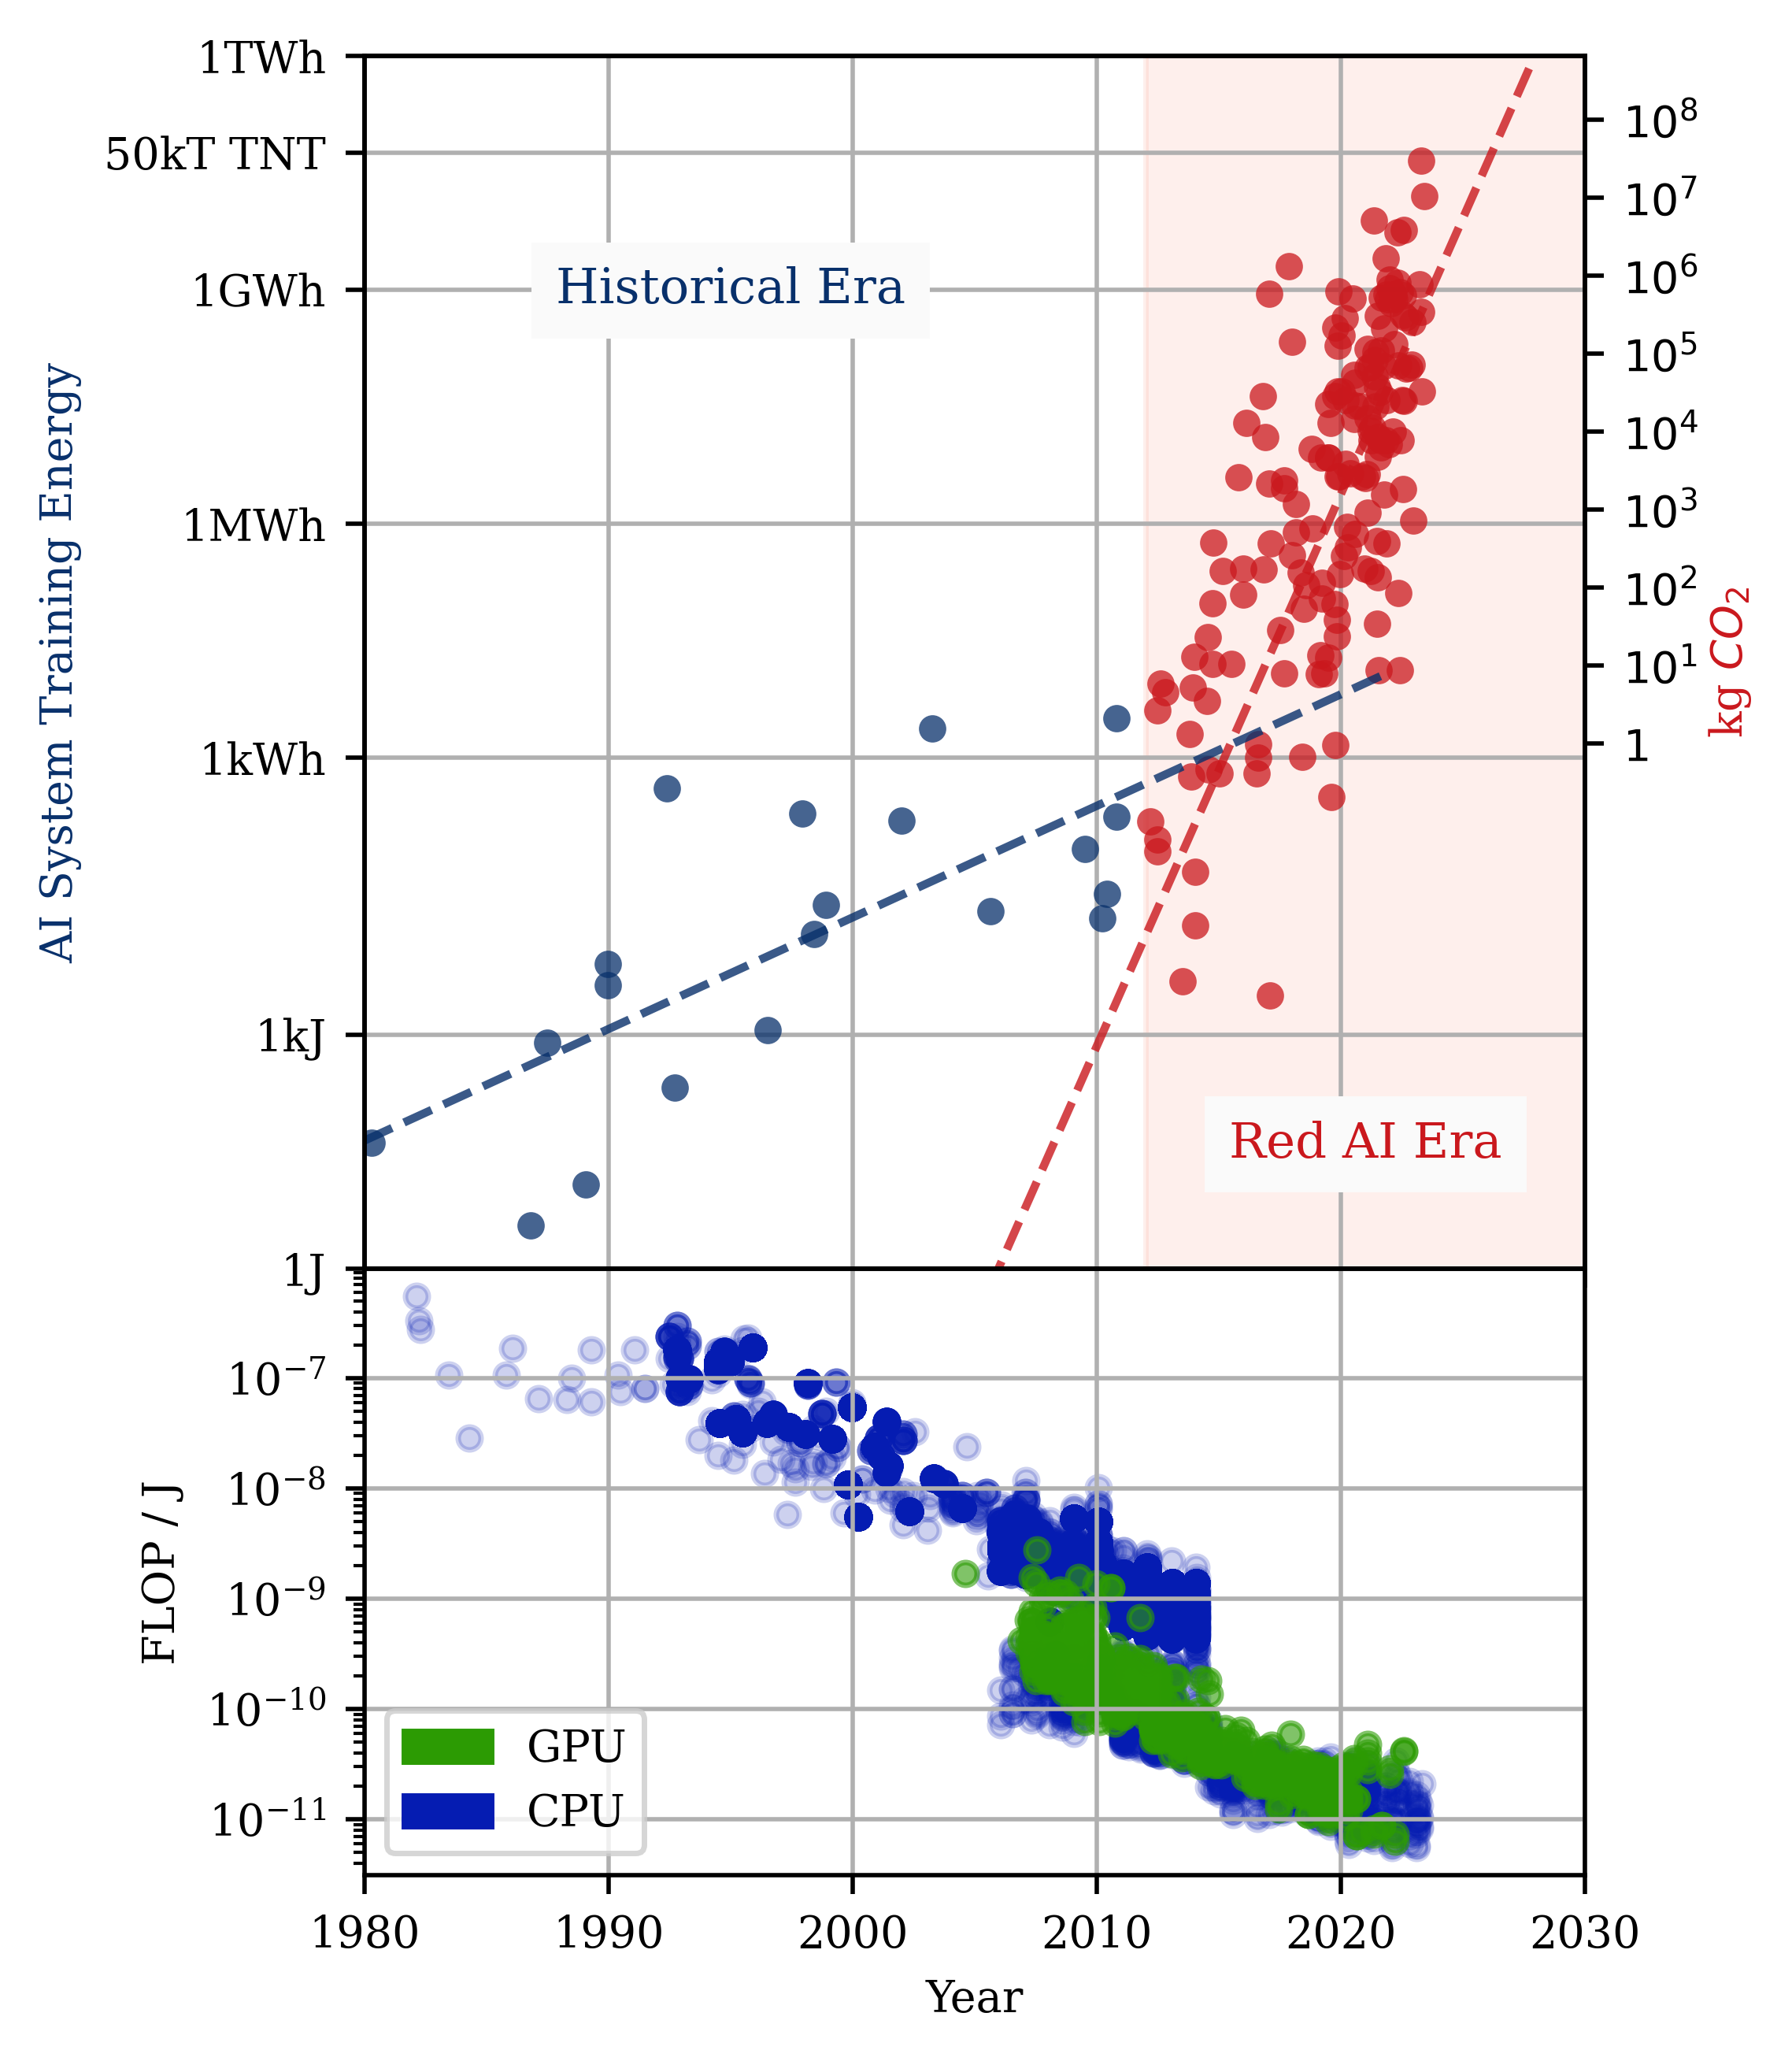

In [77]:
from matplotlib.markers import MarkerStyle
import matplotlib.patches as mpatches
import matplotlib.dates as mdates

# plt fontsize
plt.rcParams["font.size"] = 8
plt.rcParams["font.family"] = "serif"
plt.rcParams["axes.labelsize"] = 8

reds=plt.cm.Reds(np.linspace(0.25, 1, 4))
oranges=plt.cm.Oranges(np.linspace(0.25, 1, 4))
blues=plt.cm.Blues(np.linspace(0.25, 1, 3))

kwhj=3.6e6
whj=kwhj/1e3
kt_tnt=4.184e12
co2lbkwh=0.919 # Use the conversion factor for 2021
lbkg=0.453592
lbmt=lbkg/1000
pue=1.58
co2kg_per_joule = co2lbkwh * lbkg / kwhj

ny_to_la = 562 #kg CO2e

df2_sel['Log Training FLOPs'] = np.log10(df2_sel['Training compute (FLOP)'])
min_year = 1900
df2_sel['Year'] = ((df2_sel.index -pd.Timestamp(datetime.date(min_year,1,1)))  / np.timedelta64(365,'D')).astype(np.float64) + min_year

#fig, ax1 = plt.subplots(figsize = (10.4, 8.0), dpi=300)
fig, ax = plt.subplots(2,1, figsize = (4, 6), dpi=500, gridspec_kw={'height_ratios': [2, 1]}, sharex=True)


ax[0].grid()
color1 = blues[2]
color2 = reds[2]
ax[0].set_yscale('log')
ax[0].set_ylabel('AI System Training Energy', color=color1)

valid_processors = processors[~np.isnan(processors['Year']) & ~np.isnan(processors['LogFLOPs']) & ~pd.isna(processors['TDP'])].copy()
df = df2_sel[df2_sel['Year'] >= valid_processors['Year'].min()].copy()
df.sort_values('Year', inplace=True)
# x = np.arange(1980, 2024, .25)

best_cpu_index = np.array([valid_processors[valid_processors['Year'] <= y]['FLOPs'].argmax() for y in df['Year']])
# df2_sel['Best FLOP/s Avaliable'] = np.array([processors[processors['Year'] <= y]['FLOPs'].max() for y in df2_sel['Year']])
df['Best FLOP/s Avaliable'] = np.array([valid_processors['FLOPs'].iloc[i] for i in best_cpu_index])
df['TDP of Best FLOP/s CPU'] = np.array([valid_processors['TDP'].iloc[i] for i in best_cpu_index])

# df['TDP of Best CPU'] = np.array([valid_processors['TDP'].iloc[i] for i, y in enumerate(df['Year'])])
df['Training CPU-Seconds'] = df['Training compute (FLOP)'] / df['Best FLOP/s Avaliable']
df['Training Joules'] = df['TDP of Best FLOP/s CPU'] * df['Training CPU-Seconds']
df['CO2e'] = df['Training Joules'] * pue * co2lbkwh * lbkg/kwhj

print('CO2e')
print(df['CO2e'].head())

valid_df= df[~ pd.isna(df['Training Joules'])].copy()
# y = np.array([processors[processors['Year'] <= y]['FLOPs'].max() for y in df2_sel['Year']])
# ax1.scatter(valid_df['Year'], valid_df['Training Joules'], marker='.', alpha=.5, s=80, color=color1)
historical = valid_df.loc[valid_df['Year'] < 2012]
redai = valid_df.loc[valid_df['Year'] >= 2012]
ax[0].plot(historical['Year'], historical['Training Joules'], alpha=.75, color=color1, linestyle='', marker='o', fillstyle='full', markeredgecolor='none', markersize=5)
ax[0].plot(redai['Year'], redai['Training Joules'], alpha=.75, color=color2, linestyle='', marker='o', fillstyle='full', markeredgecolor='none', markersize=5)
# ax1.scatter(redai['Year'], redai['Training Joules'], marker='.', alpha=.5, s=80, color=color2, fillstyle='full')

y1min = 1.0
y1max = whj*1.0e12



y2min = y1min * (co2kg_per_joule * pue)
y2max = y1max * (co2kg_per_joule * pue)

print('y2min: ' + str(y2min))
print('y2max: ' + str(y2max))

ax2 = ax[0].twinx()

valid_df= df[~ pd.isna(df['CO2e'])].copy()

ax2.set_yscale('log')
ax2.set_ylabel('kg $CO_{2}$', color=color2, labelpad=100)

ax2.set_ylim(y2min, y2max)

#ax2.scatter(valid_df['Year'], valid_df['CO2e'], marker='.', alpha=.5, s=80, color=color2)

# print(df2_sel[~pd.isna(df2_sel['Best FLOP/s Avaliable'])]['Year'].min())

ticks = [
    #(y2min,'{:.2e}'.format(y2min)),
    (1,'$1$'),
    (1e1,'$10^{1}$'),
    (1e2,'$10^{2}$'),
    (1e3,'$10^{3}$'),
    (1e4,'$10^{4}$'),
    (1e5,'$10^{5}$'),
    (1e6,'$10^{6}$'),
    # (718.0*lbkg,'USHholdRefrig(2021)'),
    # (1984.0*lbkg,'1 NY->SF Flight'),
    # (11023.0*lbkg,'HumanLife / yr'),
    # (ny_to_la, '1 NY->LA Flight'),
    # (36156.0*lbkg,'American Life / yr'),
    # (48000.0, 'US Household / yr'),
    (10.0**7,'$10^{7}$'),
    # (1000*ny_to_la, '1,000 Flights NY->LA'),
    # (50000*ny_to_la, '50,000 Flights NY->LA'),
    # (1000*48000.0, '$1000$ US Households'),
    # (1.1e8,'Kiribati(2022)'),
    (10**8,'$10^{8}$'),
    # (1e,'{:.2e}'.format(y2max)),
    # (y2max,'{:.2e}'.format(y2max)),
    ]

ax2.set_yticks([t[0] for t in ticks], [t[1] for t in ticks])

Axis.set_label_coords(ax2.yaxis,1.1, 0.5) 



split = 2012
early = valid_df.loc[valid_df['Year'] <= split]
late = valid_df.loc[valid_df['Year'] >= split+7]

early_reg = scipy.stats.linregress(early['Year'], np.log10(early['Training Joules']))
print(f'early {np.log10(2) / early_reg.slope}')
x = np.arange(1980, split+10, .25)

ax[0].plot(x, np.power(10, early_reg.intercept + early_reg.slope*x), color=blues[2], linestyle='--', label='Historical Trend', alpha=.8)


late_reg = scipy.stats.linregress(late['Year'], np.log10(late['Training Joules']))
print(f'late {np.log10(2) / late_reg.slope}')
x = np.arange(split-10, 2030, .25)
ax[0].plot(x, np.power(10, late_reg.intercept + late_reg.slope*x), color=reds[2], linestyle='--', label='Modern Trend', alpha=.8)


#ax1.fill_between((1950, 2012), (1, 1), (1e20, 1e20), alpha=.1, color=blues[1])
ax[0].fill_between((2012, 2040), (1, 1), (1e20, 1e20), alpha=.1, color=reds[1])

ax[0].set_xlim(1980, 2030)
ax[0].set_ylim(1, whj*1e12)
#ax[0].set_xlabel('Year')
ax[0].set_ylabel('AI System Training Energy')
ax[0].set_yticks([1, 1e3, kwhj, whj*1e6, whj*1e9, 50*kt_tnt, whj*1e12],['1J', '1kJ', '1kWh', '1MWh', '1GWh', '50kT TNT', '1TWh'])
ax[0].text(1995,whj*1e9 *1, "Historical Era",  color=color1, ha="center", va="center", fontsize =9, backgroundcolor='0.98')
ax[0].text(2021, 1e2*.4, "Red AI Era",  color=color2, ha="center", va="center", fontsize =9, backgroundcolor='0.98')
# plt.ylabel('log$_{10}$(Number of Training FLOPs)')

# plotting the legend 
#ax2.legend(bbox_to_anchor = (0.35, 0.75), loc = 'upper center') 

cpu_patch = mpatches.Patch(color=cpu_color, label='CPU')
gpu_patch = mpatches.Patch(color=gpu_color, label='GPU')


ax[1].legend(handles=[gpu_patch, cpu_patch], loc='lower left')

ax[1].set_yscale('log')

# plt.plot(x, np.power(10, early_reg.intercept + early_reg.slope*x), 'g--', label='Historical Trend', alpha=.8)

processors['J_per_flop'] = processors['TDP'] / processors['FLOPs']
cpu_mask = (processors['Type'] == 1) & ~np.isnan(processors['Year']) & ~np.isnan(processors['J_per_flop']) 
masked_cpu = processors[cpu_mask]
ax[1].scatter(masked_cpu['Year'], masked_cpu['J_per_flop'], marker='.', alpha=.2, s=70, color=cpu_color)

gpu_mask = (processors['Type'] == 2) & ~np.isnan(processors['Year']) & ~np.isnan(processors['J_per_flop']) 

masked_gpu = processors[gpu_mask]
ax[1].scatter(masked_gpu['Year'], masked_gpu['J_per_flop'], marker='.', alpha=.6, s=70, color=gpu_color)

# cpu_flop_cmax = masked_cpu['LogFLOPs'].cummax()
# ax.plot(masked_cpu['Year'], np.power(10, cpu_flop_cmax))

# x = np.arange(1980, 2024, .25)
# processor_best_case = np.array([processors[processors['Year'] <= y]['FLOPs'].max() for y in x])

# ax.plot(x, processor_best_case, 'k')

# flop_reg = scipy.stats.linregress(masked_cpu['Year'], cpu_flop_cmax)

# print(flop_reg.intercept, flop_reg.slope)
# ax.plot(x, np.power(10, flop_reg.intercept + flop_reg.slope*x), 'r--', label='FLOPs Trend', alpha=.8)
# plt.fill_between((1950, 2012), (1, 1), (1e27, 1e27), alpha=.1, color='grey')
# plt.fill_between((2012, 2040), (1, 1), (1e27, 1e27), alpha=.1, color='red')
# plt.xlim(1950, 2030)
# plt.ylim(1, 1e27)
# plt.xlabel('Year')
# plt.ylabel('Training FLOPs')
# plt.yticks([1e0, 1e3, 1e6, 1e9, 1e12, 1e15, 1e18, 1e21, 1e24, 1e27], ['1', '1 kiloflop', '1 Megaflop', '1 Gigaflop', '1 Teraflop', '1 Petaflop', '1 Exaflop', '1 Zettaflop', '1 Yottaflop', '1 Ronnaflop'])
# plt.text(1970, 30e15, "Historical Trend\nFollowed Moore's Law\nDoubled Every 2 Years",  ha="center", va="center", fontsize =9)
# plt.text(2019, 700e6, "Red AI Trend\nExplosive Growth\nDoubling Every\n3-4 Months",  ha="center", va="center", fontsize =9)
ax[1].set_ylabel('FLOP / J')
ax[1].set_xlabel('Year')
ax[1].grid()
# ax.legend(['CPUs', 'GPUs'], loc='lower right')
# ax.set_yticks([1e6, 1e9, 1e12, ], ['1 MFLOP/J', '1 GFLOP/J', '1 TFLOP/J',])
# ax.fill_between((1950, 2012), (1, 1), (1e27, 1e27), alpha=.1, color='grey')
# ax.fill_between((2012, 2040), (1, 1), (1e27, 1e27), alpha=.1, color='red')
ax[1].set_xlim(1980, 2030)
plt.subplots_adjust(hspace=0)


#fig.tight_layout()
#fig.show()
#fig.savefig('ai_energy_co2_cpu_gpu_trends.svg', bbox_inches="tight")

CO2e
Publication date
1980-04-01    0.000012
1986-10-01    0.000001
1987-06-06    0.000231
1989-01-01    0.000003
1989-12-01    0.002350
Name: CO2e, dtype: float64
y2min: 1.1579195777777778e-07
y2max: 416851048.0
early 2.103718867618602
late 0.42519215717964426


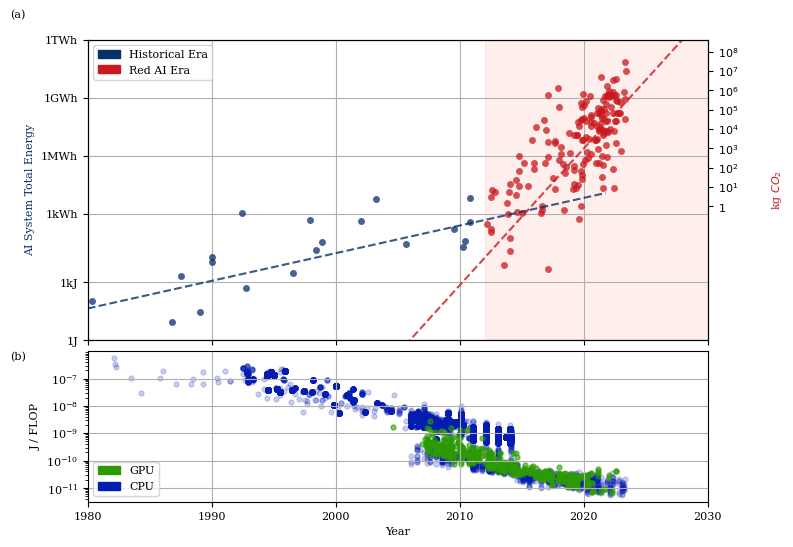

In [78]:
from matplotlib.markers import MarkerStyle
import matplotlib.patches as mpatches
import matplotlib.dates as mdates

# plt fontsize
plt.rcParams["font.size"] = 8
plt.rcParams["font.family"] = "serif"
plt.rcParams["axes.labelsize"] = 8

reds=plt.cm.Reds(np.linspace(0.25, 1, 4))
oranges=plt.cm.Oranges(np.linspace(0.25, 1, 4))
blues=plt.cm.Blues(np.linspace(0.25, 1, 3))

kwhj=3.6e6
whj=kwhj/1e3
kt_tnt=4.184e12
co2lbkwh=0.919 # Use the conversion factor for 2021
lbkg=0.453592
lbmt=lbkg/1000
#pue=1.58

df2_sel['Log Training FLOPs'] = np.log10(df2_sel['Training compute (FLOP)'])
min_year = 1900
df2_sel['Year'] = ((df2_sel.index -pd.Timestamp(datetime.date(min_year,1,1)))  / np.timedelta64(365,'D')).astype(np.float64) + min_year

#fig, ax1 = plt.subplots(figsize = (10.4, 8.0), dpi=300)
fig, ax = plt.subplots(2,1, figsize = (8, 6), gridspec_kw={'height_ratios': [2, 1]}, sharex=True)


ax[0].grid()
color1 = blues[2]
color2 = reds[2]
ax[0].set_yscale('log')
ax[0].set_ylabel('AI System Training Energy', color=color1)

valid_processors = processors[~np.isnan(processors['Year']) & ~np.isnan(processors['LogFLOPs']) & ~pd.isna(processors['TDP'])].copy()
df = df2_sel[df2_sel['Year'] >= valid_processors['Year'].min()].copy()
df.sort_values('Year', inplace=True)
# x = np.arange(1980, 2024, .25)

best_cpu_index = np.array([valid_processors[valid_processors['Year'] <= y]['FLOPs'].argmax() for y in df['Year']])
# df2_sel['Best FLOP/s Avaliable'] = np.array([processors[processors['Year'] <= y]['FLOPs'].max() for y in df2_sel['Year']])
df['Best FLOP/s Avaliable'] = np.array([valid_processors['FLOPs'].iloc[i] for i in best_cpu_index])
df['TDP of Best FLOP/s CPU'] = np.array([valid_processors['TDP'].iloc[i] for i in best_cpu_index])

# df['TDP of Best CPU'] = np.array([valid_processors['TDP'].iloc[i] for i, y in enumerate(df['Year'])])
df['Training CPU-Seconds'] = df['Training compute (FLOP)'] / df['Best FLOP/s Avaliable']
df['Training Joules'] = df['TDP of Best FLOP/s CPU'] * df['Training CPU-Seconds']


df['PUE'] = 1.58
df['co2lbkwh'] = 0.954

df.loc[df.index <='2007-12-31','PUE'] = 2.5
df.loc[df.index >= '2023-01-01','PUE'] = 1.58
df.loc[(df.index >= '2022-01-01') & (df.index <= '2022-12-31'),'PUE'] = 1.55
df.loc[(df.index >= '2021-01-01') & (df.index <= '2021-12-31'),'PUE'] = 1.57
df.loc[(df.index >= '2020-01-01') & (df.index <= '2020-12-31'),'PUE'] = 1.59
df.loc[(df.index >= '2019-01-01') & (df.index <= '2019-12-31'),'PUE'] = 1.67
df.loc[(df.index >= '2018-01-01') & (df.index <= '2018-12-31'),'PUE'] = 1.58
df.loc[(df.index >= '2013-01-01') & (df.index <= '2013-12-31'),'PUE'] = 1.65
df.loc[(df.index >= '2014-01-01') & (df.index <= '2014-12-31'),'PUE'] = 1.65 + (1.58-1.65)*0.2
df.loc[(df.index >= '2015-01-01') & (df.index <= '2015-12-31'),'PUE'] = 1.65 + 2.0*(1.58-1.65)*0.2
df.loc[(df.index >= '2016-01-01') & (df.index <= '2016-12-31'),'PUE'] = 1.65 + 3.0*(1.58-1.65)*0.2
df.loc[(df.index >= '2017-01-01') & (df.index <= '2017-12-31'),'PUE'] = 1.65 + 4.0*(1.58-1.65)*0.2
df.loc[(df.index >= '2011-01-01') & (df.index <= '2011-12-31'),'PUE'] = 1.98
df.loc[(df.index >= '2012-01-01') & (df.index <= '2012-12-31'),'PUE'] = (1.98+1.65)*0.5
df.loc[(df.index >= '2008-01-01') & (df.index <= '2008-12-31'),'PUE'] = 2.5 + 0.25*(1.98-2.5)
df.loc[(df.index >= '2009-01-01') & (df.index <= '2009-12-31'),'PUE'] = 2.5 + 0.25*(1.98-2.5)*2.0
df.loc[(df.index >= '2010-01-01') & (df.index <= '2010-12-31'),'PUE'] = 2.5 + 0.25*(1.98-2.5)*3.0

df.loc[(df.index <= '2018-12-31'),'co2lbkwh'] = 1.017
df.loc[(df.index >= '2019-01-01') & (df.index <= '2019-12-31'),'co2lbkwh'] = 0.954
df.loc[(df.index >= '2020-01-01') & (df.index <= '2020-12-31'),'co2lbkwh'] = 0.883
df.loc[(df.index >= '2021-01-01'),'co2lbkwh'] = 0.919

#df['CO2e'] = df['Training Joules'] * pue * co2lbkwh * lbkg/kwhj
df['Total Joules'] = df['Training Joules'] * df['PUE']
df['CO2e'] = df['Training Joules'] * df['PUE'] * co2lbkwh * lbkg/kwhj


print('CO2e')
print(df['CO2e'].head())

valid_df= df[~ pd.isna(df['Total Joules'])].copy()
# y = np.array([processors[processors['Year'] <= y]['FLOPs'].max() for y in df2_sel['Year']])
# ax1.scatter(valid_df['Year'], valid_df['Training Joules'], marker='.', alpha=.5, s=80, color=color1)
historical = valid_df.loc[valid_df['Year'] < 2012]
redai = valid_df.loc[valid_df['Year'] >= 2012]
ax[0].plot(historical['Year'], historical['Total Joules'], alpha=.75, color=color1, linestyle='', marker='o', fillstyle='full', markeredgecolor='none', markersize=5)
ax[0].plot(redai['Year'], redai['Total Joules'], alpha=.75, color=color2, linestyle='', marker='o', fillstyle='full', markeredgecolor='none', markersize=5)
# ax1.scatter(redai['Year'], redai['Training Joules'], marker='.', alpha=.5, s=80, color=color2, fillstyle='full')

y1min = 1.0
y1max = whj*1.0e12

co2kg_per_joule = co2lbkwh * lbkg / kwhj

y2min = y1min * co2kg_per_joule 
y2max = y1max * co2kg_per_joule

print('y2min: ' + str(y2min))
print('y2max: ' + str(y2max))

ax2 = ax[0].twinx()

valid_df= df[~ pd.isna(df['CO2e'])].copy()

ax2.set_yscale('log')
ax2.set_ylabel('kg $CO_{2}$', color=color2, labelpad=100)

ax2.set_ylim(y2min, y2max)

#ax2.scatter(valid_df['Year'], valid_df['CO2e'], marker='.', alpha=.5, s=80, color=color2)

# print(df2_sel[~pd.isna(df2_sel['Best FLOP/s Avaliable'])]['Year'].min())

ticks = [
    #(y2min,'{:.2e}'.format(y2min)),
    (1,'$1$'),
    (1e1,'$10^{1}$'),
    (1e2,'$10^{2}$'),
    (1e3,'$10^{3}$'),
    (1e4,'$10^{4}$'),
    (1e5,'$10^{5}$'),
    (1e6,'$10^{6}$'),
    # (718.0*lbkg,'USHholdRefrig(2021)'),
    # (1984.0*lbkg,'1 NY->SF Flight'),
    # (11023.0*lbkg,'HumanLife / yr'),
    # (ny_to_la, '1 NY->LA Flight'),
    # (36156.0*lbkg,'American Life / yr'),
    # (48000.0, 'US Household / yr'),
    (10.0**7,'$10^{7}$'),
    # (1000*ny_to_la, '1,000 Flights NY->LA'),
    # (50000*ny_to_la, '50,000 Flights NY->LA'),
    # (1000*48000.0, '$1000$ US Households'),
    # (1.1e8,'Kiribati(2022)'),
    (10**8,'$10^{8}$'),
    # (1e,'{:.2e}'.format(y2max)),
    # (y2max,'{:.2e}'.format(y2max)),
    ]

ax2.set_yticks([t[0] for t in ticks], [t[1] for t in ticks])

Axis.set_label_coords(ax2.yaxis,1.1, 0.5) 



split = 2012
early = valid_df.loc[valid_df['Year'] <= split]
late = valid_df.loc[valid_df['Year'] >= split+7]

early_reg = scipy.stats.linregress(early['Year'], np.log10(early['Training Joules']))
print(f'early {np.log10(2) / early_reg.slope}')
x = np.arange(1980, split+10, .25)

ax[0].plot(x, np.power(10, early_reg.intercept + early_reg.slope*x), color=blues[2], linestyle='--', label='Historical Trend', alpha=.8)


late_reg = scipy.stats.linregress(late['Year'], np.log10(late['Training Joules']))
print(f'late {np.log10(2) / late_reg.slope}')
x = np.arange(split-10, 2030, .25)
ax[0].plot(x, np.power(10, late_reg.intercept + late_reg.slope*x), color=reds[2], linestyle='--', label='Modern Trend', alpha=.8)


#ax1.fill_between((1950, 2012), (1, 1), (1e20, 1e20), alpha=.1, color=blues[1])
ax[0].fill_between((2012, 2040), (1, 1), (1e20, 1e20), alpha=.1, color=reds[1])

ax[0].set_xlim(1980, 2030)
ax[0].set_ylim(1, whj*1e12)
#ax[0].set_xlabel('Year')
ax[0].set_ylabel('AI System Total Energy')
ax[0].set_yticks([1, 1e3, kwhj, whj*1e6, whj*1e9, whj*1e12],['1J', '1kJ', '1kWh', '1MWh', '1GWh', '1TWh'])
#ax[0].text(1995,whj*1e9 *1, "Historical Era",  color=color1, ha="center", va="center", fontsize =9, backgroundcolor='0.98')
#ax[0].text(2021, 1e2*.4, "Red AI Era",  color=color2, ha="center", va="center", fontsize =9, backgroundcolor='0.98')
# plt.ylabel('log$_{10}$(Number of Training FLOPs)')

# plotting the legend 
#ax2.legend(bbox_to_anchor = (0.35, 0.75), loc = 'upper center') 
historical_patch = mpatches.Patch(color=color1, label='Historical Era')
redai_patch = mpatches.Patch(color=color2, label='Red AI Era')

ax[0].legend(handles=[historical_patch, redai_patch], loc='upper left')


cpu_patch = mpatches.Patch(color=cpu_color, label='CPU')
gpu_patch = mpatches.Patch(color=gpu_color, label='GPU')


ax[1].legend(handles=[gpu_patch, cpu_patch], loc='lower left')

ax[1].set_yscale('log')

# plt.plot(x, np.power(10, early_reg.intercept + early_reg.slope*x), 'g--', label='Historical Trend', alpha=.8)

processors['J_per_flop'] = processors['TDP'] / processors['FLOPs']
cpu_mask = (processors['Type'] == 1) & ~np.isnan(processors['Year']) & ~np.isnan(processors['J_per_flop']) 
masked_cpu = processors[cpu_mask]
ax[1].scatter(masked_cpu['Year'], masked_cpu['J_per_flop'], marker='.', alpha=.2, s=50, color=cpu_color)

gpu_mask = (processors['Type'] == 2) & ~np.isnan(processors['Year']) & ~np.isnan(processors['J_per_flop']) 

masked_gpu = processors[gpu_mask]
ax[1].scatter(masked_gpu['Year'], masked_gpu['J_per_flop'], marker='.', alpha=.6, s=50, color=gpu_color)

# cpu_flop_cmax = masked_cpu['LogFLOPs'].cummax()
# ax.plot(masked_cpu['Year'], np.power(10, cpu_flop_cmax))

# x = np.arange(1980, 2024, .25)
# processor_best_case = np.array([processors[processors['Year'] <= y]['FLOPs'].max() for y in x])

# ax.plot(x, processor_best_case, 'k')

# flop_reg = scipy.stats.linregress(masked_cpu['Year'], cpu_flop_cmax)

# print(flop_reg.intercept, flop_reg.slope)
# ax.plot(x, np.power(10, flop_reg.intercept + flop_reg.slope*x), 'r--', label='FLOPs Trend', alpha=.8)
# plt.fill_between((1950, 2012), (1, 1), (1e27, 1e27), alpha=.1, color='grey')
# plt.fill_between((2012, 2040), (1, 1), (1e27, 1e27), alpha=.1, color='red')
# plt.xlim(1950, 2030)
# plt.ylim(1, 1e27)
# plt.xlabel('Year')
# plt.ylabel('Training FLOPs')
# plt.yticks([1e0, 1e3, 1e6, 1e9, 1e12, 1e15, 1e18, 1e21, 1e24, 1e27], ['1', '1 kiloflop', '1 Megaflop', '1 Gigaflop', '1 Teraflop', '1 Petaflop', '1 Exaflop', '1 Zettaflop', '1 Yottaflop', '1 Ronnaflop'])
# plt.text(1970, 30e15, "Historical Trend\nFollowed Moore's Law\nDoubled Every 2 Years",  ha="center", va="center", fontsize =9)
# plt.text(2019, 700e6, "Red AI Trend\nExplosive Growth\nDoubling Every\n3-4 Months",  ha="center", va="center", fontsize =9)
ax[1].set_ylabel('J / FLOP')
ax[1].set_xlabel('Year')
ax[1].grid()
# ax.legend(['CPUs', 'GPUs'], loc='lower right')
# ax.set_yticks([1e6, 1e9, 1e12, ], ['1 MFLOP/J', '1 GFLOP/J', '1 TFLOP/J',])
# ax.fill_between((1950, 2012), (1, 1), (1e27, 1e27), alpha=.1, color='grey')
# ax.fill_between((2012, 2040), (1, 1), (1e27, 1e27), alpha=.1, color='red')
ax[1].set_xlim(1980, 2030)
plt.subplots_adjust(hspace=0.05)

ax[0].text(-0.1, 1.1, "(a)", transform=ax[0].transAxes, fontsize=8, va="top", ha="right")
ax[1].text(-0.1, 1.0, "(b)", transform=ax[1].transAxes, fontsize=8, va="top", ha="right")

#fig.tight_layout()
#fig.show()
fig.savefig('./figures/ai_energy_co2_cpu_gpu_trends.png', dpi=500, bbox_inches="tight")